In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,4)
plt.rcParams['figure.dpi']=300

# To perform Simple Linear Regression
import statsmodels.formula.api as smf

# To avoid warnings
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# delivery_time

In [2]:
#Read Data
df = pd.read_csv('D:\Data Science Assignments\Assignment 4 Simple LR\delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
df[df.duplicated()] # No duplicates

,Delivery Time,Sorting Time


In [6]:
df.isnull().sum() # No missing values

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: >

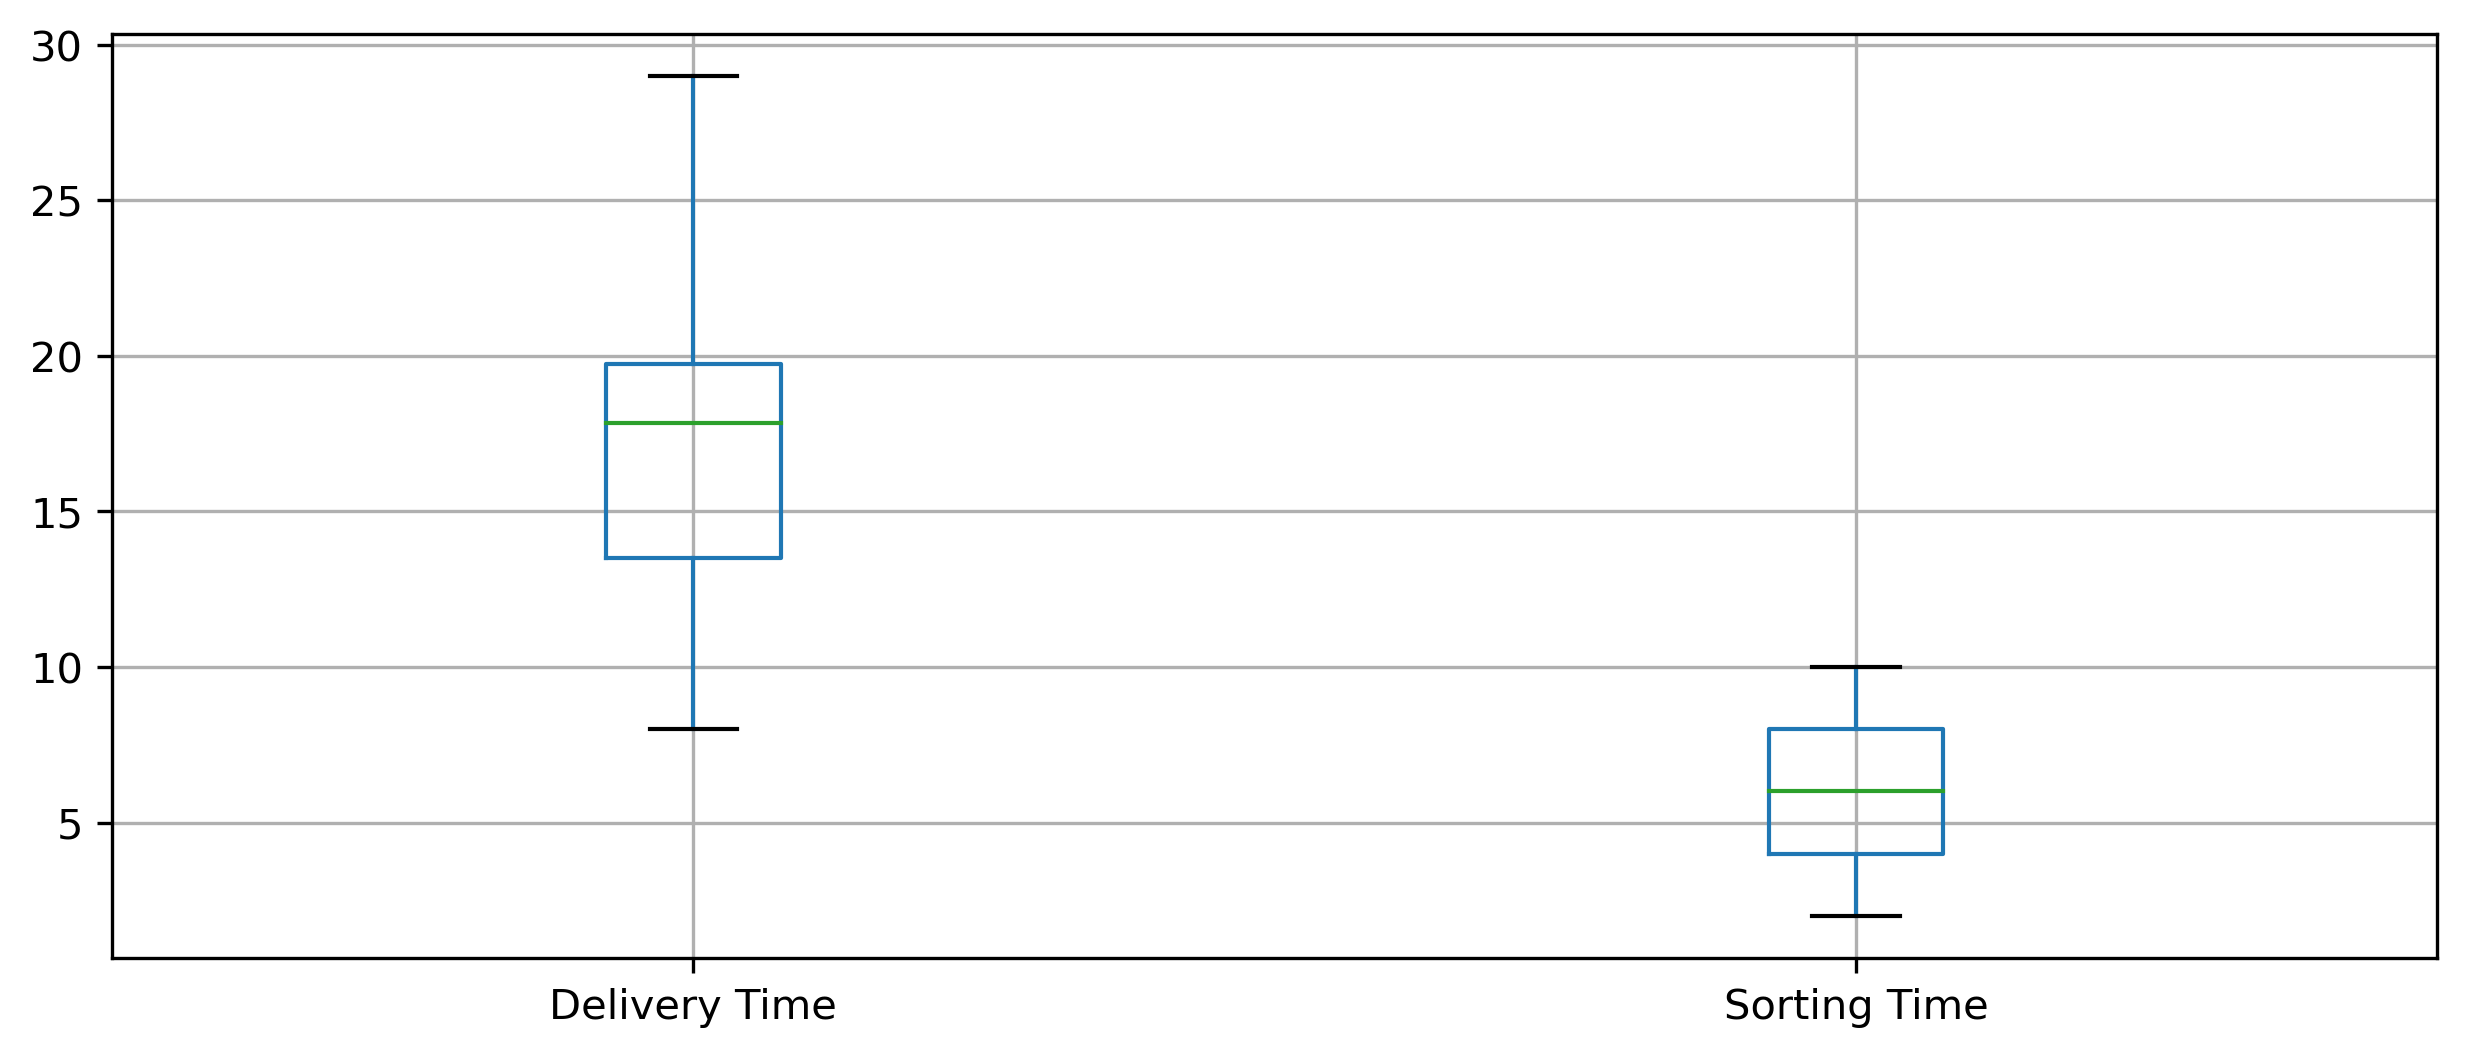

In [7]:
df.boxplot() # To check Outliers

In [8]:
# Rename columns
df.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},inplace=True)

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

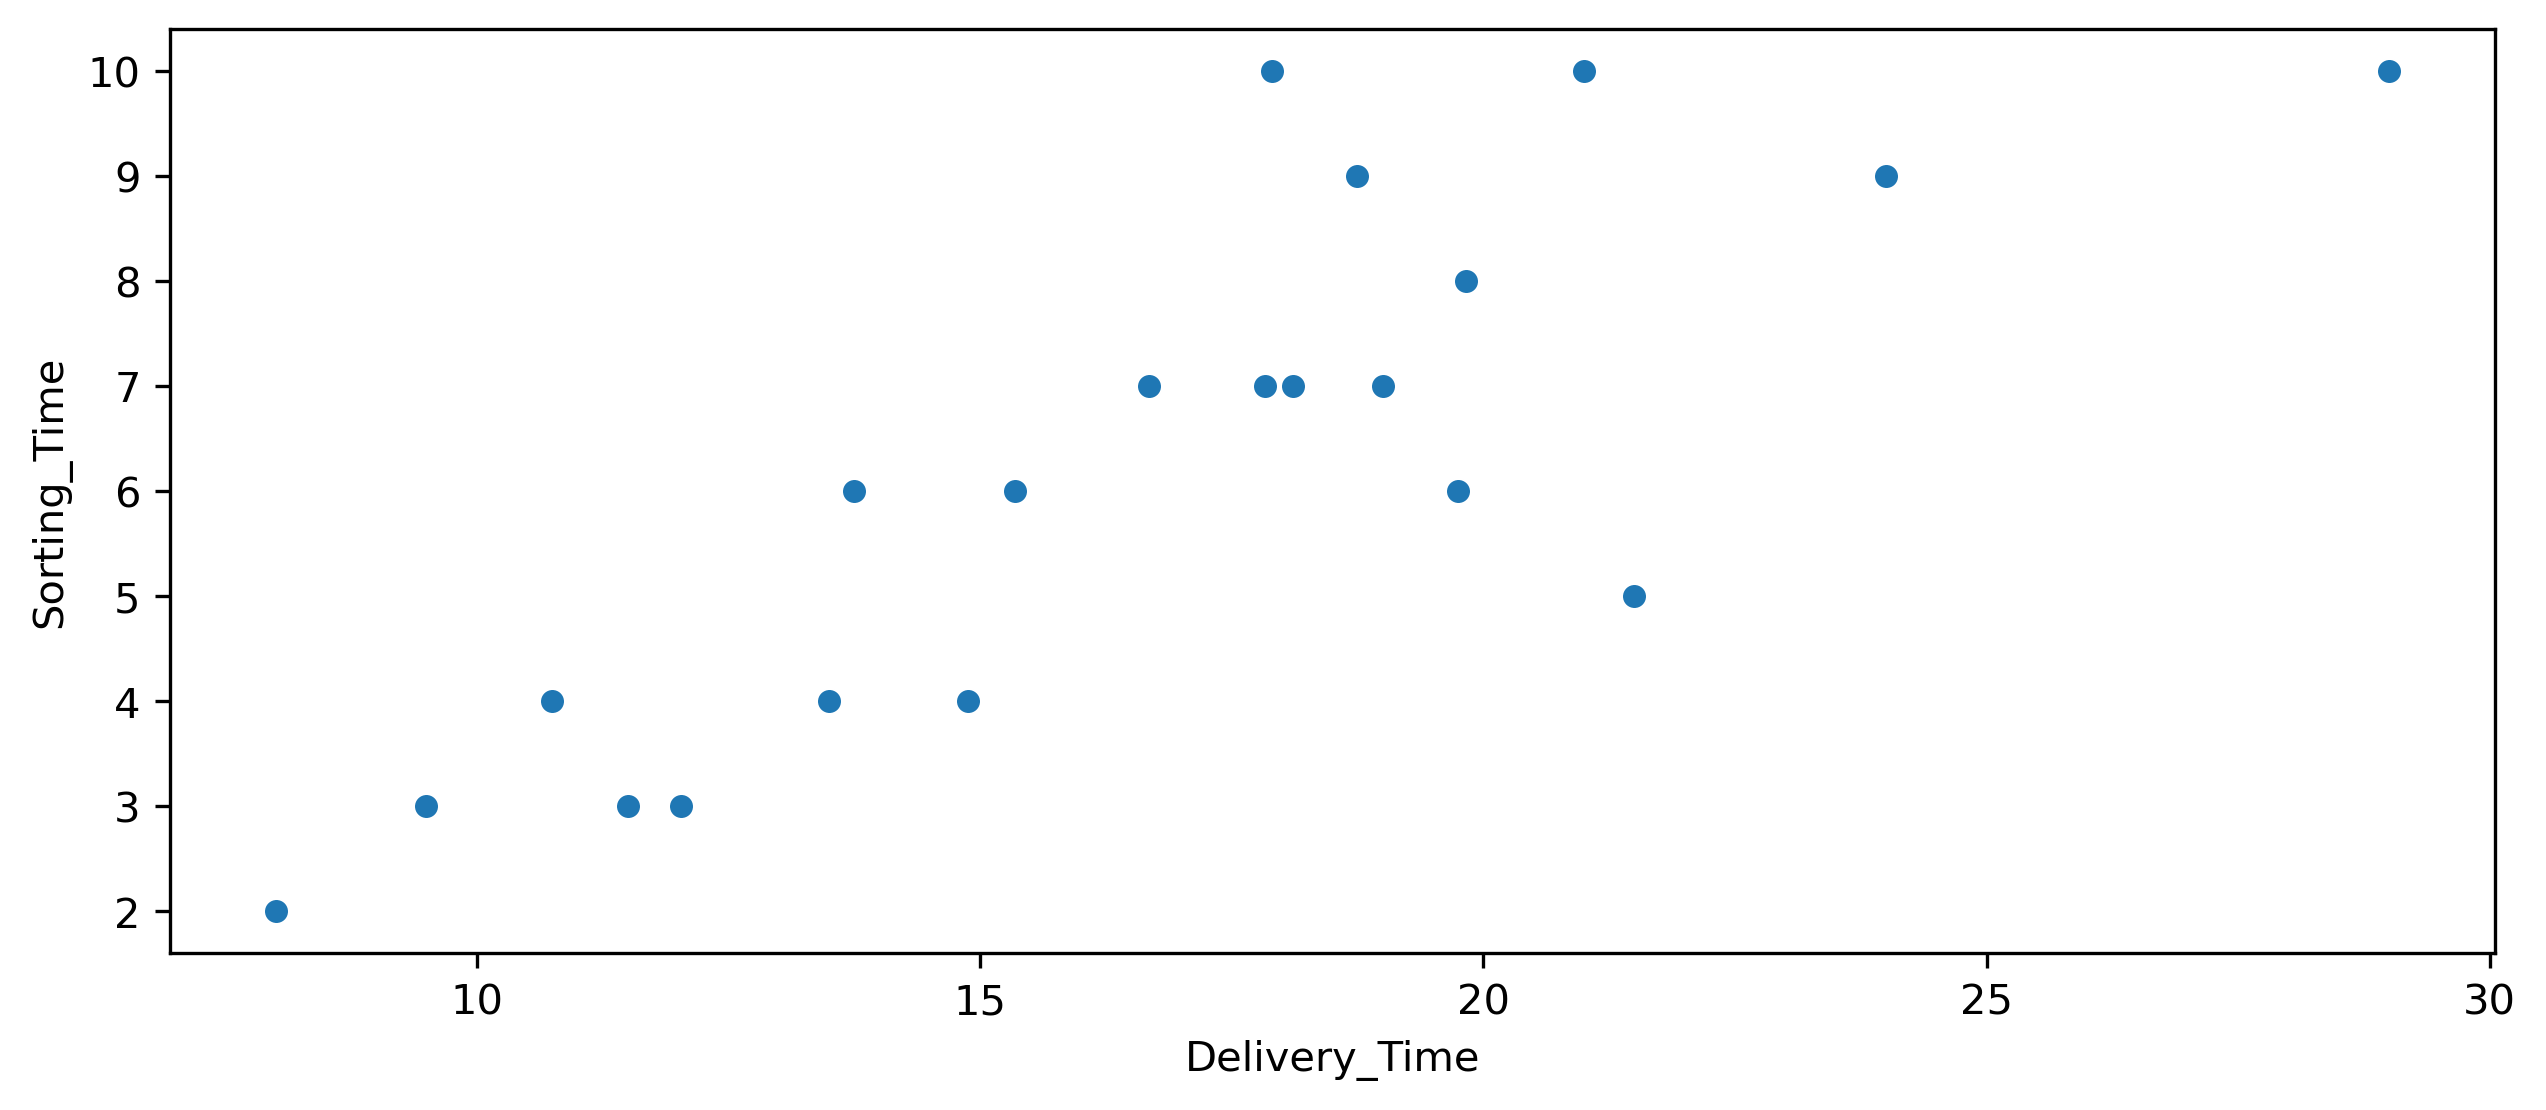

In [9]:
# To see realtion between two variables
sns.scatterplot(x=df['Delivery_Time'],y=df['Sorting_Time'])

In [10]:
# Magnitude of relation between two variables
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: >

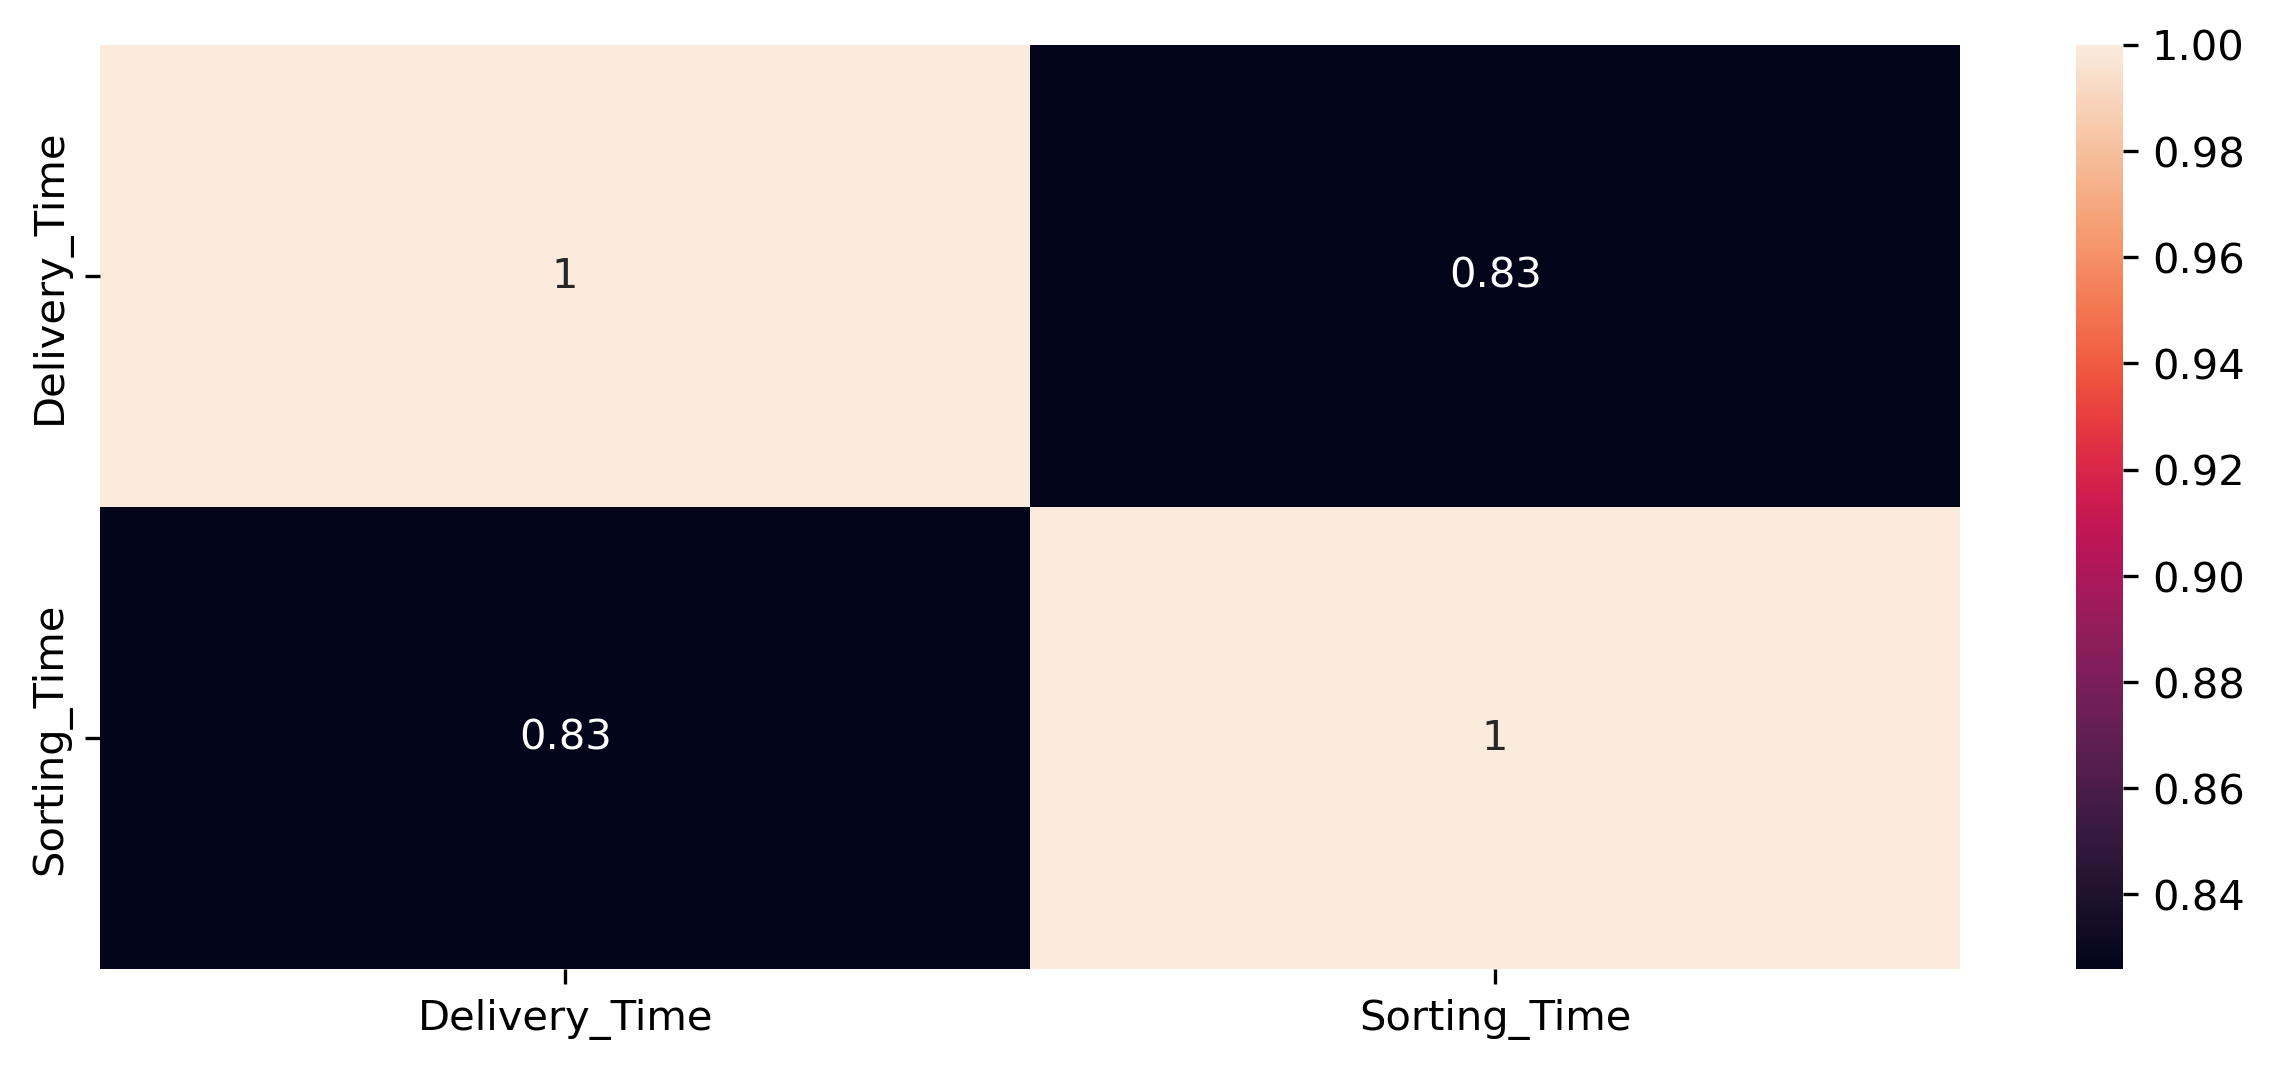

In [11]:
sns.heatmap(df.corr(),annot=True) #Visualize the correlation

In [12]:
# Model building
model = smf.ols('Delivery_Time ~ Sorting_Time',data=df).fit()
model

In [13]:
# Parameter such as slope and intercept
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [14]:
c,m=model.params

In [15]:
c,m

(6.582733971997052, 1.6490198968312457)

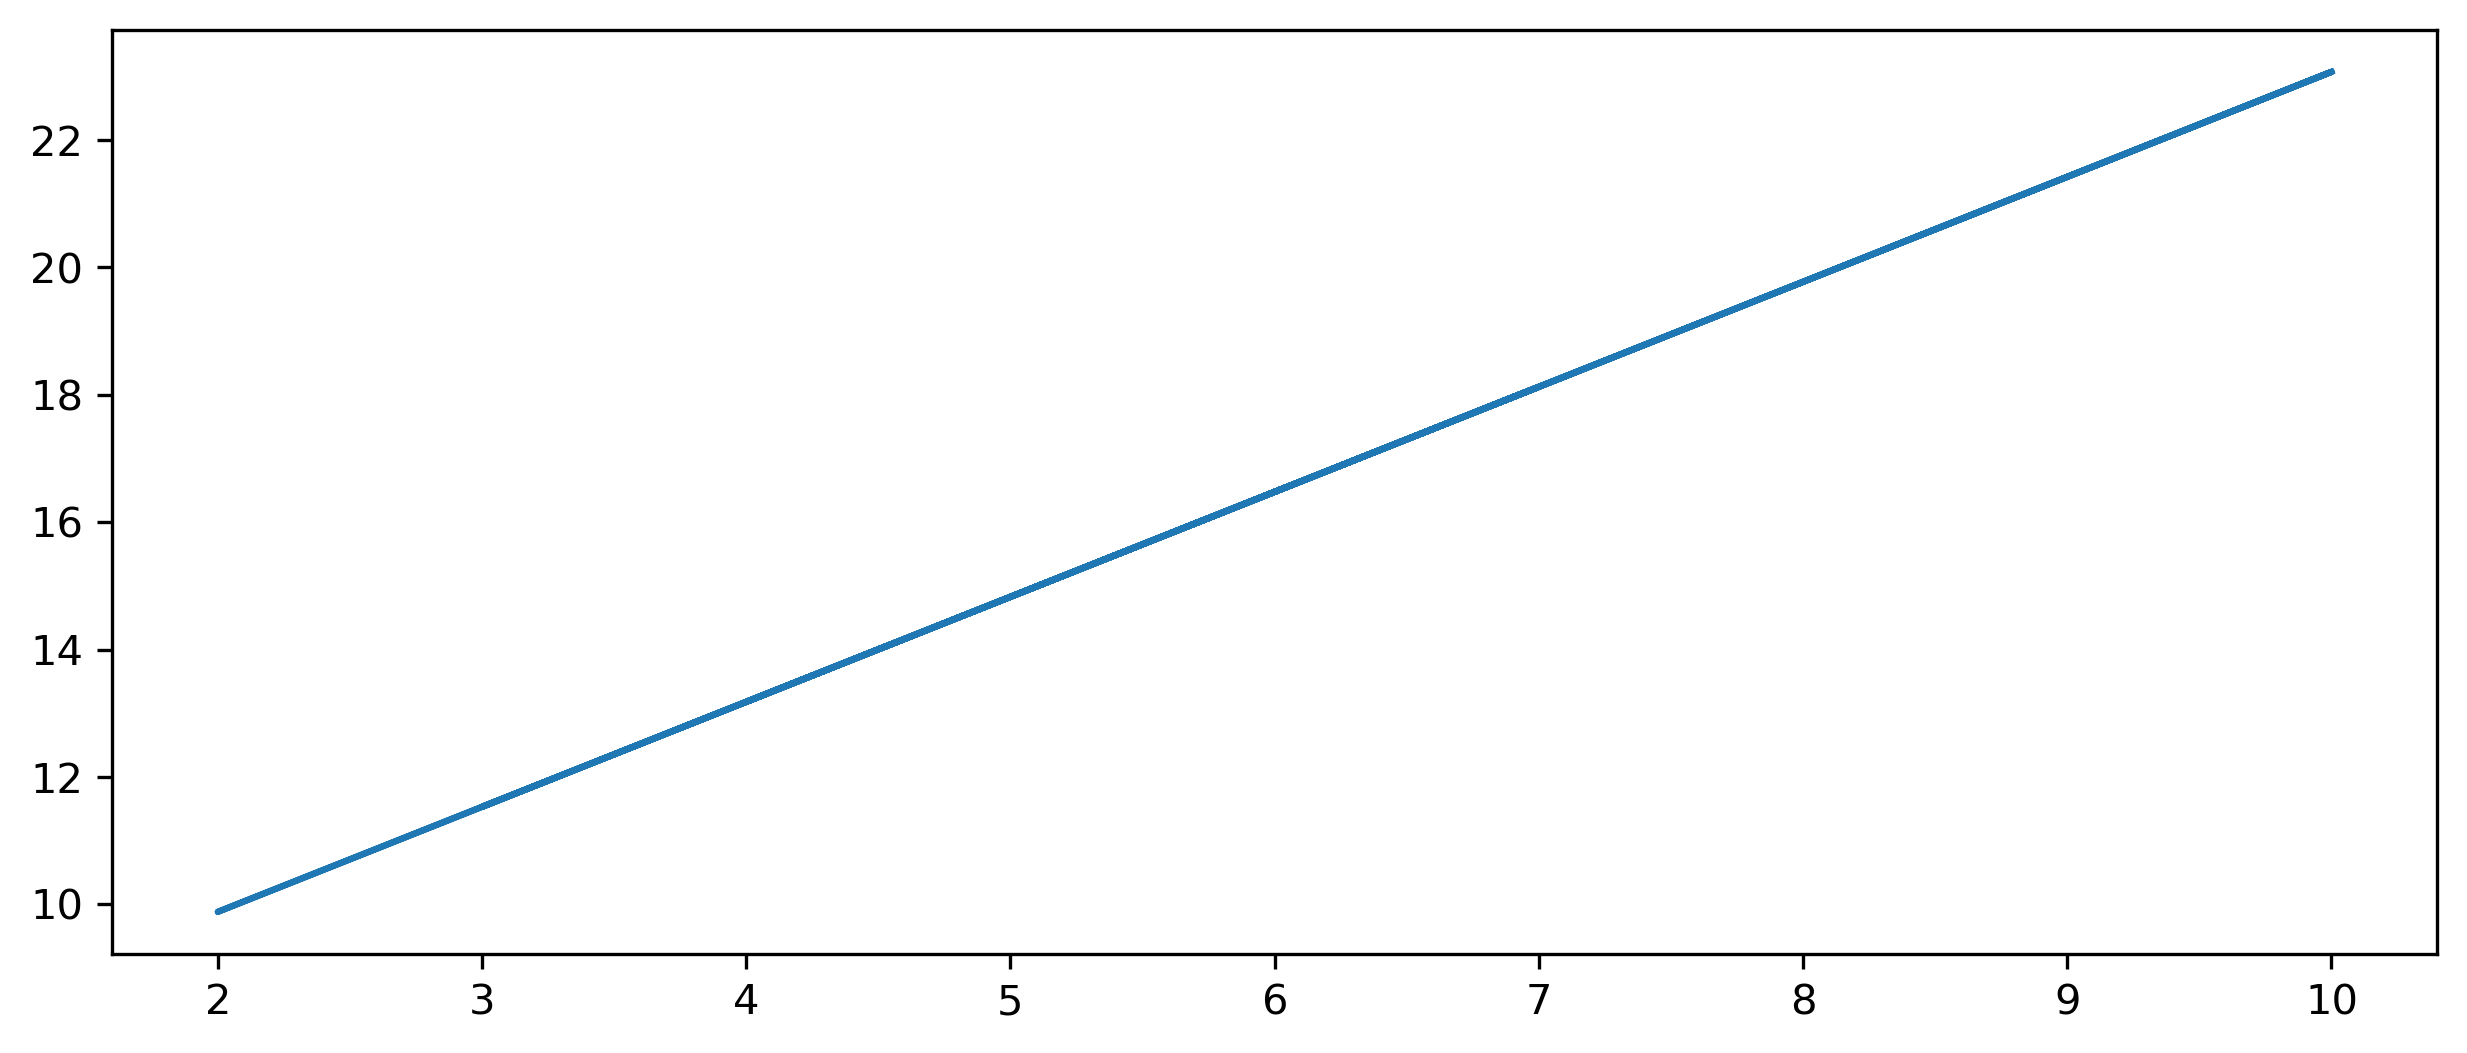

In [16]:
# Best fit line
plt.plot(df['Sorting_Time'],m*df['Sorting_Time']+c)

In [17]:
# Evaluation of model
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [18]:
#Test data
test = pd.DataFrame({
    'Sorting_Time' : [10,2,8,6,9]
})
test

,Sorting_Time
0,10
1,2
2,8
3,6
4,9


In [19]:
#Predictions
model.predict(test)

0    23.072933
1     9.880774
2    19.774893
3    16.476853
4    21.423913
dtype: float64

In [20]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


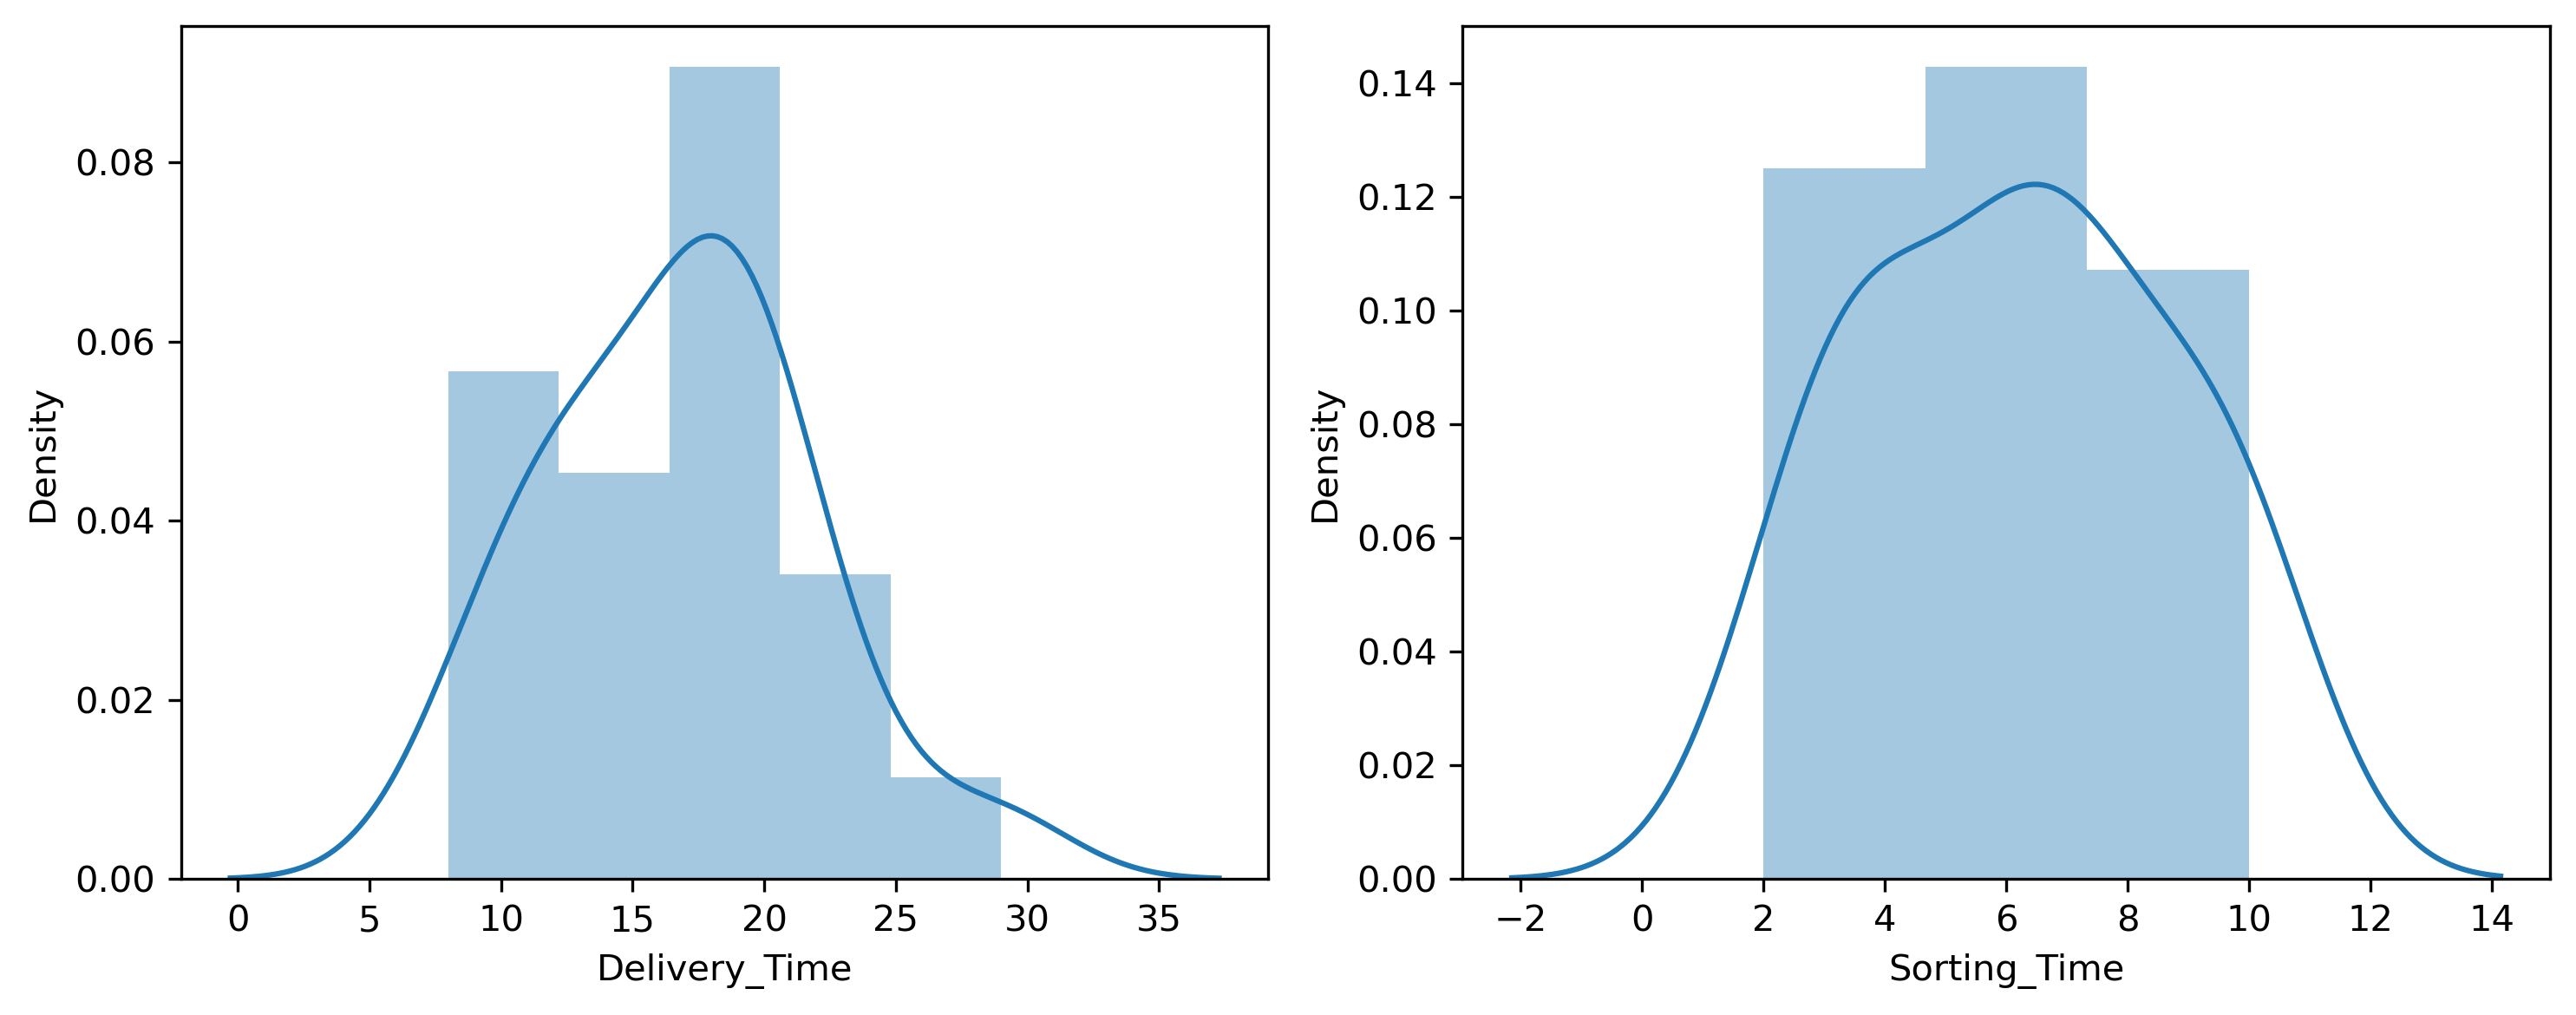

In [21]:
plt.subplot(1,2,1)
sns.distplot(df['Delivery_Time'])

plt.subplot(1,2,2)
sns.distplot(df['Sorting_Time'])

plt.tight_layout()

In [22]:
df['Delivery_Time'].skew(),df['Sorting_Time'].skew()

(0.3523900822831107, 0.047115474210530174)

In [23]:
df['Log_Delivery_Time'] = np.log(df['Delivery_Time'])
df['Log_Sorting_Time'] = np.log(df['Sorting_Time'])
df

,Delivery_Time,Sorting_Time,Log_Delivery_Time,Log_Sorting_Time
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


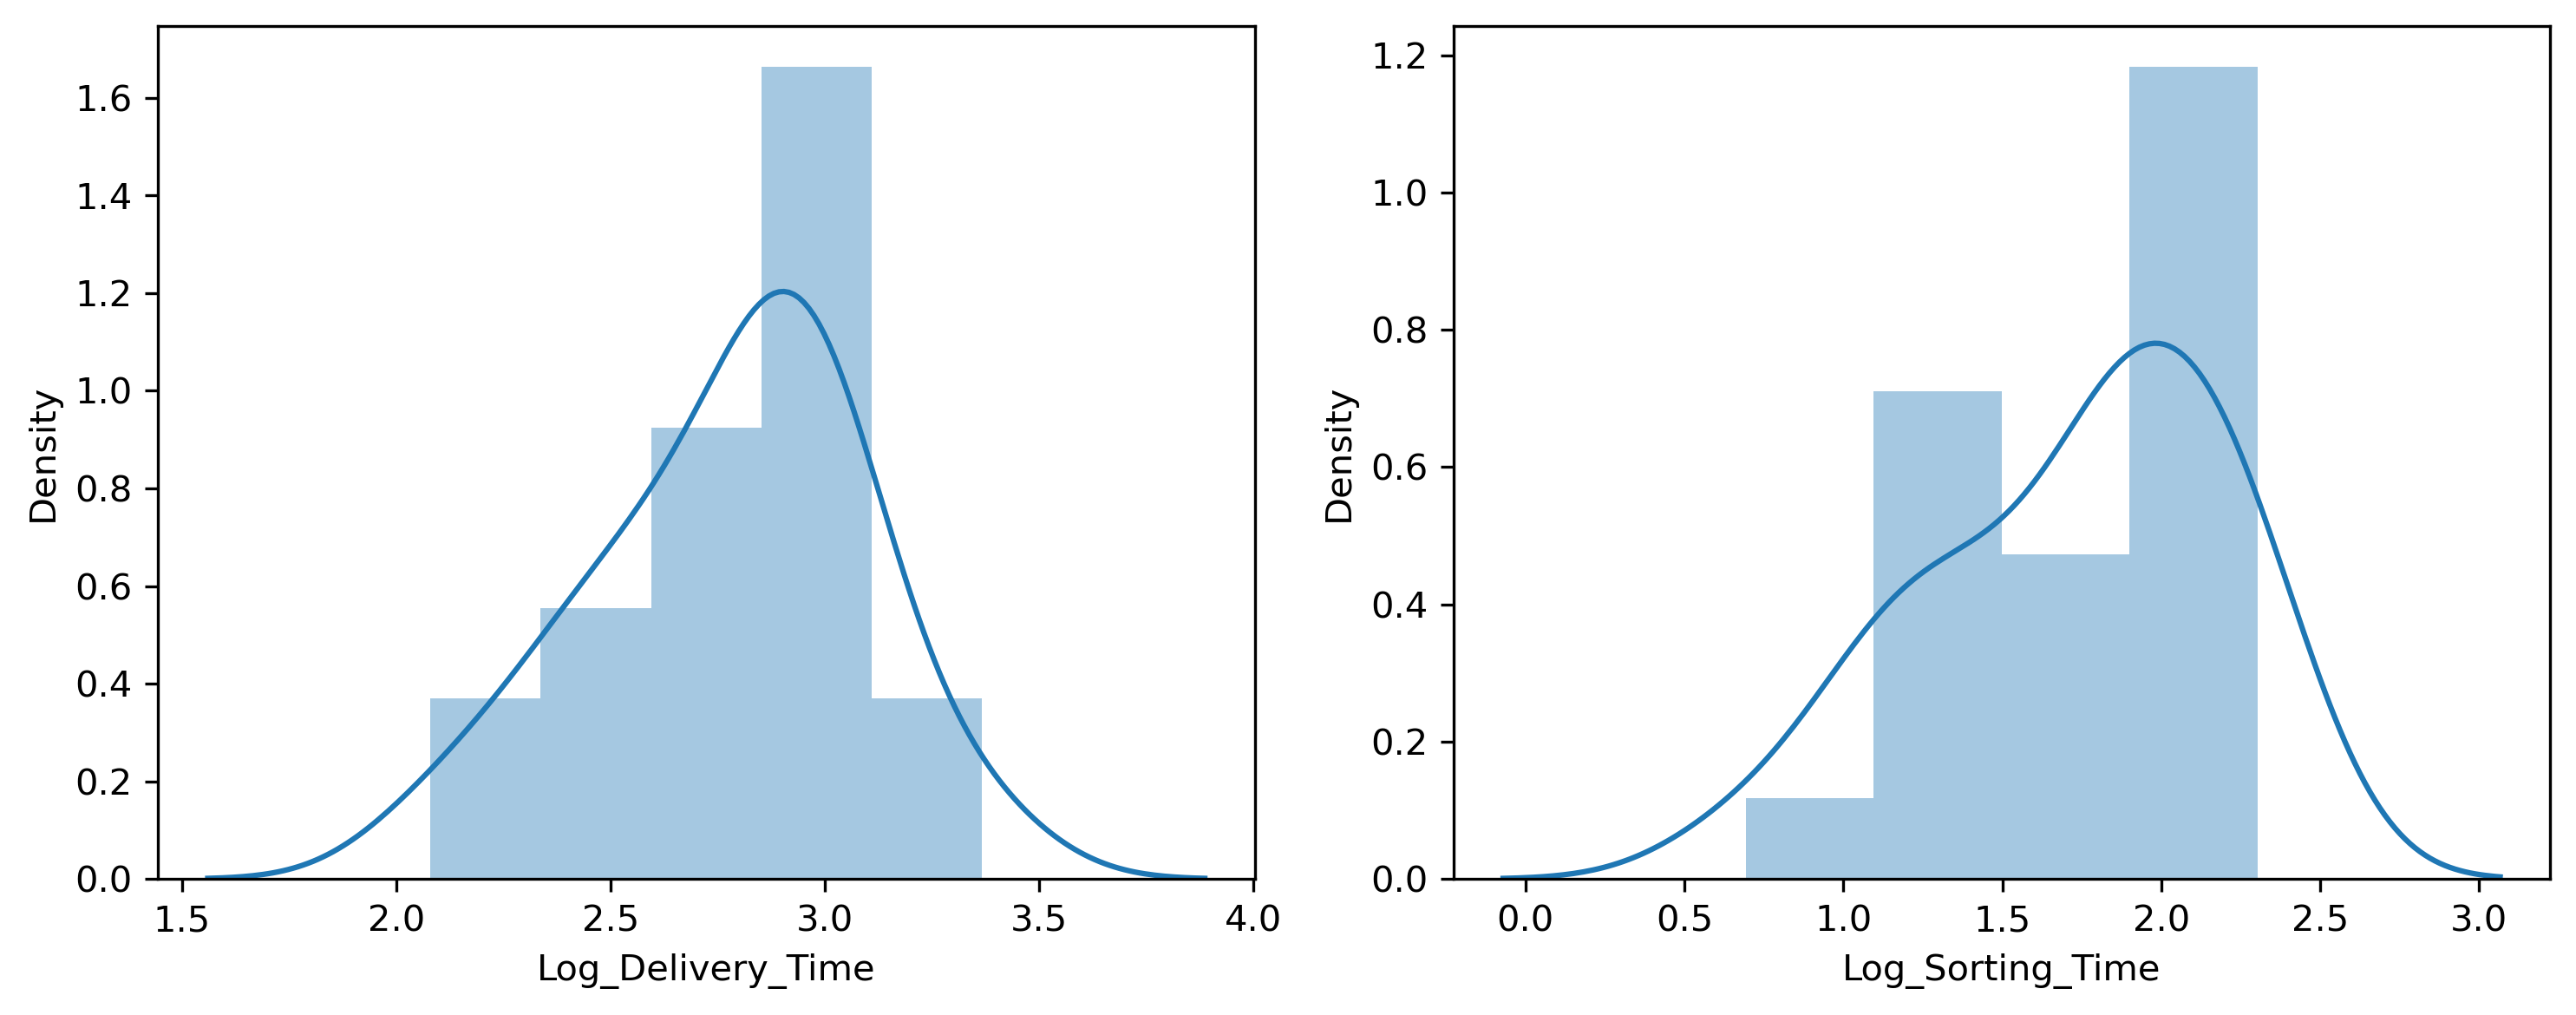

In [24]:
plt.subplot(1,2,1)
sns.distplot(df['Log_Delivery_Time'])

plt.subplot(1,2,2)
sns.distplot(df['Log_Sorting_Time'])

plt.tight_layout()

In [25]:
df['Log_Delivery_Time'].skew(),df['Log_Sorting_Time'].skew()

(-0.4512901148522999, -0.6052357185134765)

In [26]:
df['Sqrt_Delivery_Time'] = np.sqrt(df['Delivery_Time'])
df['Sqrt_Sorting_Time'] = np.sqrt(df['Sorting_Time'])
df

,Delivery_Time,Sorting_Time,Log_Delivery_Time,Log_Sorting_Time,Sqrt_Delivery_Time,Sqrt_Sorting_Time
0,21.00,10,3.044522,2.302585,4.582576,3.162278
1,13.50,4,2.602690,1.386294,3.674235,2.000000
2,19.75,6,2.983153,1.791759,4.444097,2.449490
3,24.00,9,3.178054,2.197225,4.898979,3.000000
4,29.00,10,3.367296,2.302585,5.385165,3.162278
5,15.35,6,2.731115,1.791759,3.917908,2.449490
6,19.00,7,2.944439,1.945910,4.358899,2.645751
7,9.50,3,2.251292,1.098612,3.082207,1.732051
8,17.90,10,2.884801,2.302585,4.230839,3.162278
9,18.75,9,2.931194,2.197225,4.330127,3.000000


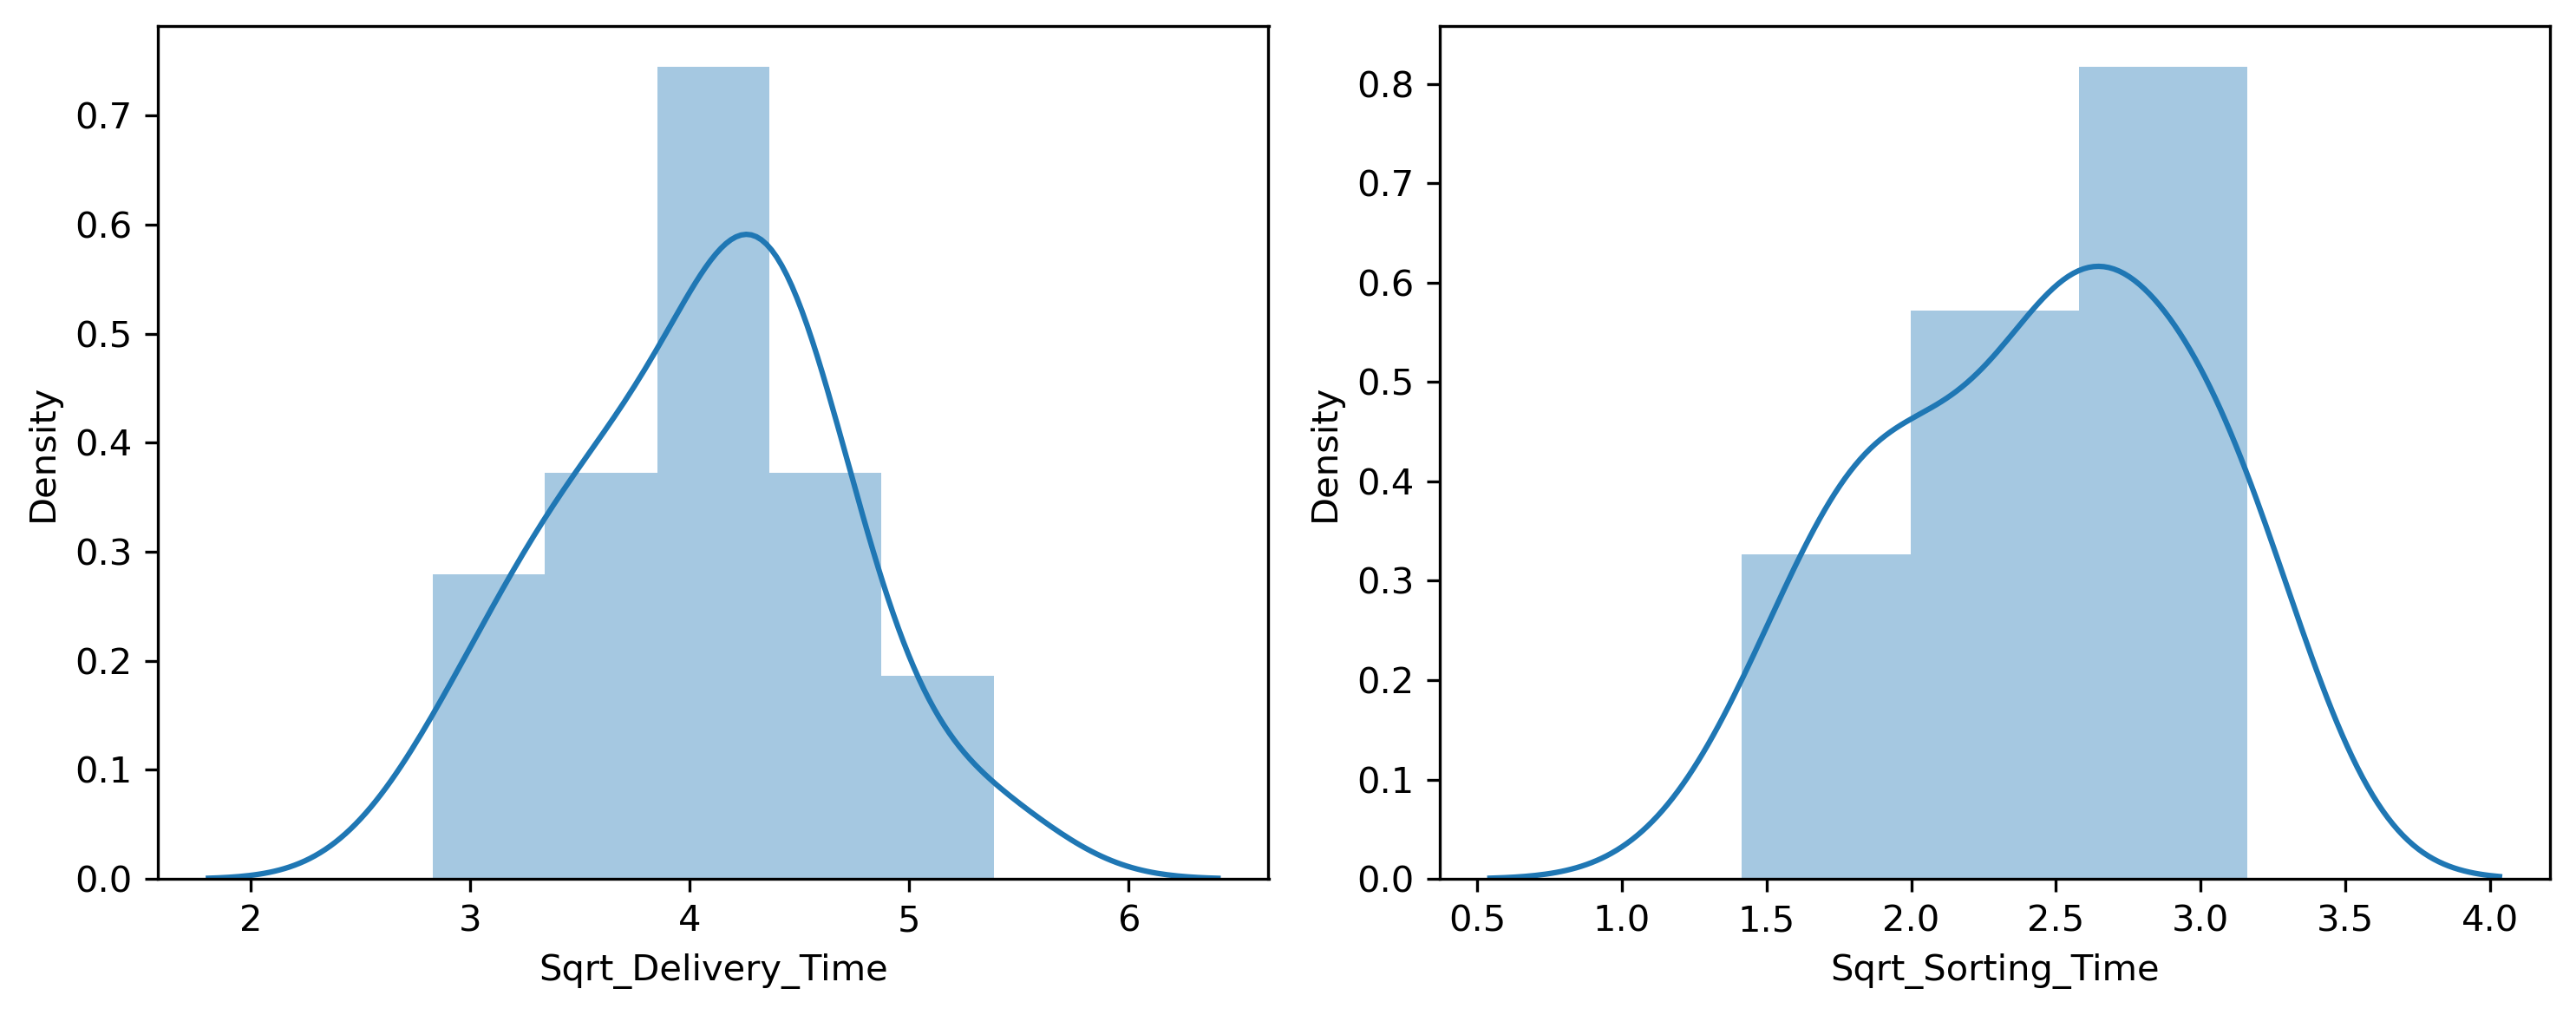

In [27]:
plt.subplot(1,2,1)
sns.distplot(df['Sqrt_Delivery_Time'])

plt.subplot(1,2,2)
sns.distplot(df['Sqrt_Sorting_Time'])

plt.tight_layout()

In [28]:
df['Sqrt_Delivery_Time'].skew(),df['Sqrt_Sorting_Time'].skew()

(-0.0618105135865213, -0.25981634723613994)

# Salary_data

In [29]:
#Read the data
df = pd.read_csv('D:\Data Science Assignments\Assignment 4 Simple LR\Salary_data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [30]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [32]:
df.dtypes #Data types

YearsExperience    float64
Salary             float64
dtype: object

In [33]:
df[df.duplicated()] #No duplicates

,YearsExperience,Salary


In [34]:
df.isnull().sum() #No missing values

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

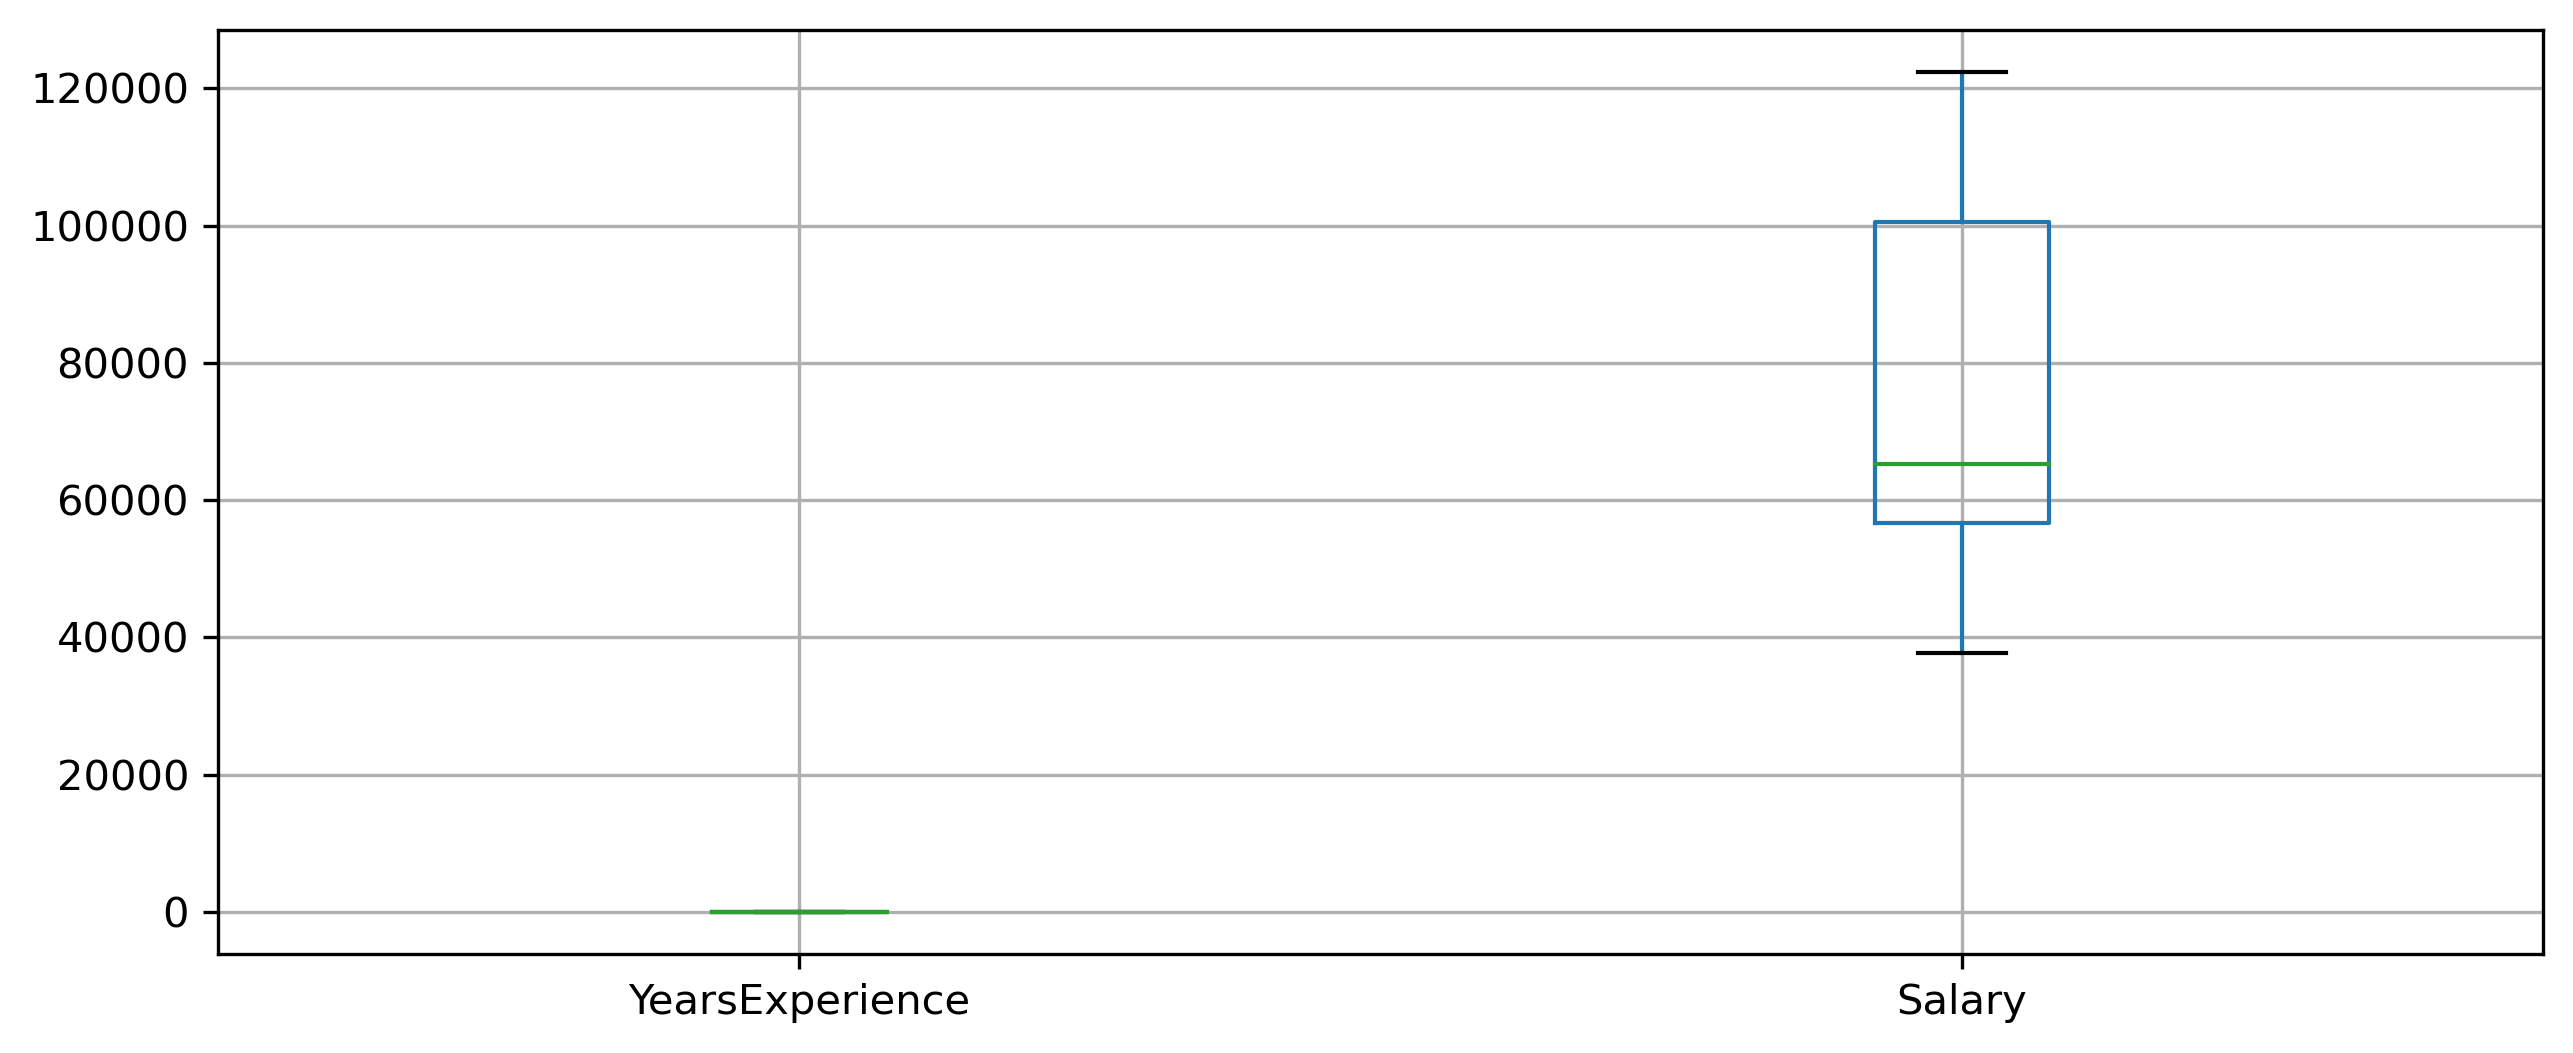

In [35]:
df.boxplot() # To check outliers

<Axes: xlabel='YearsExperience'>

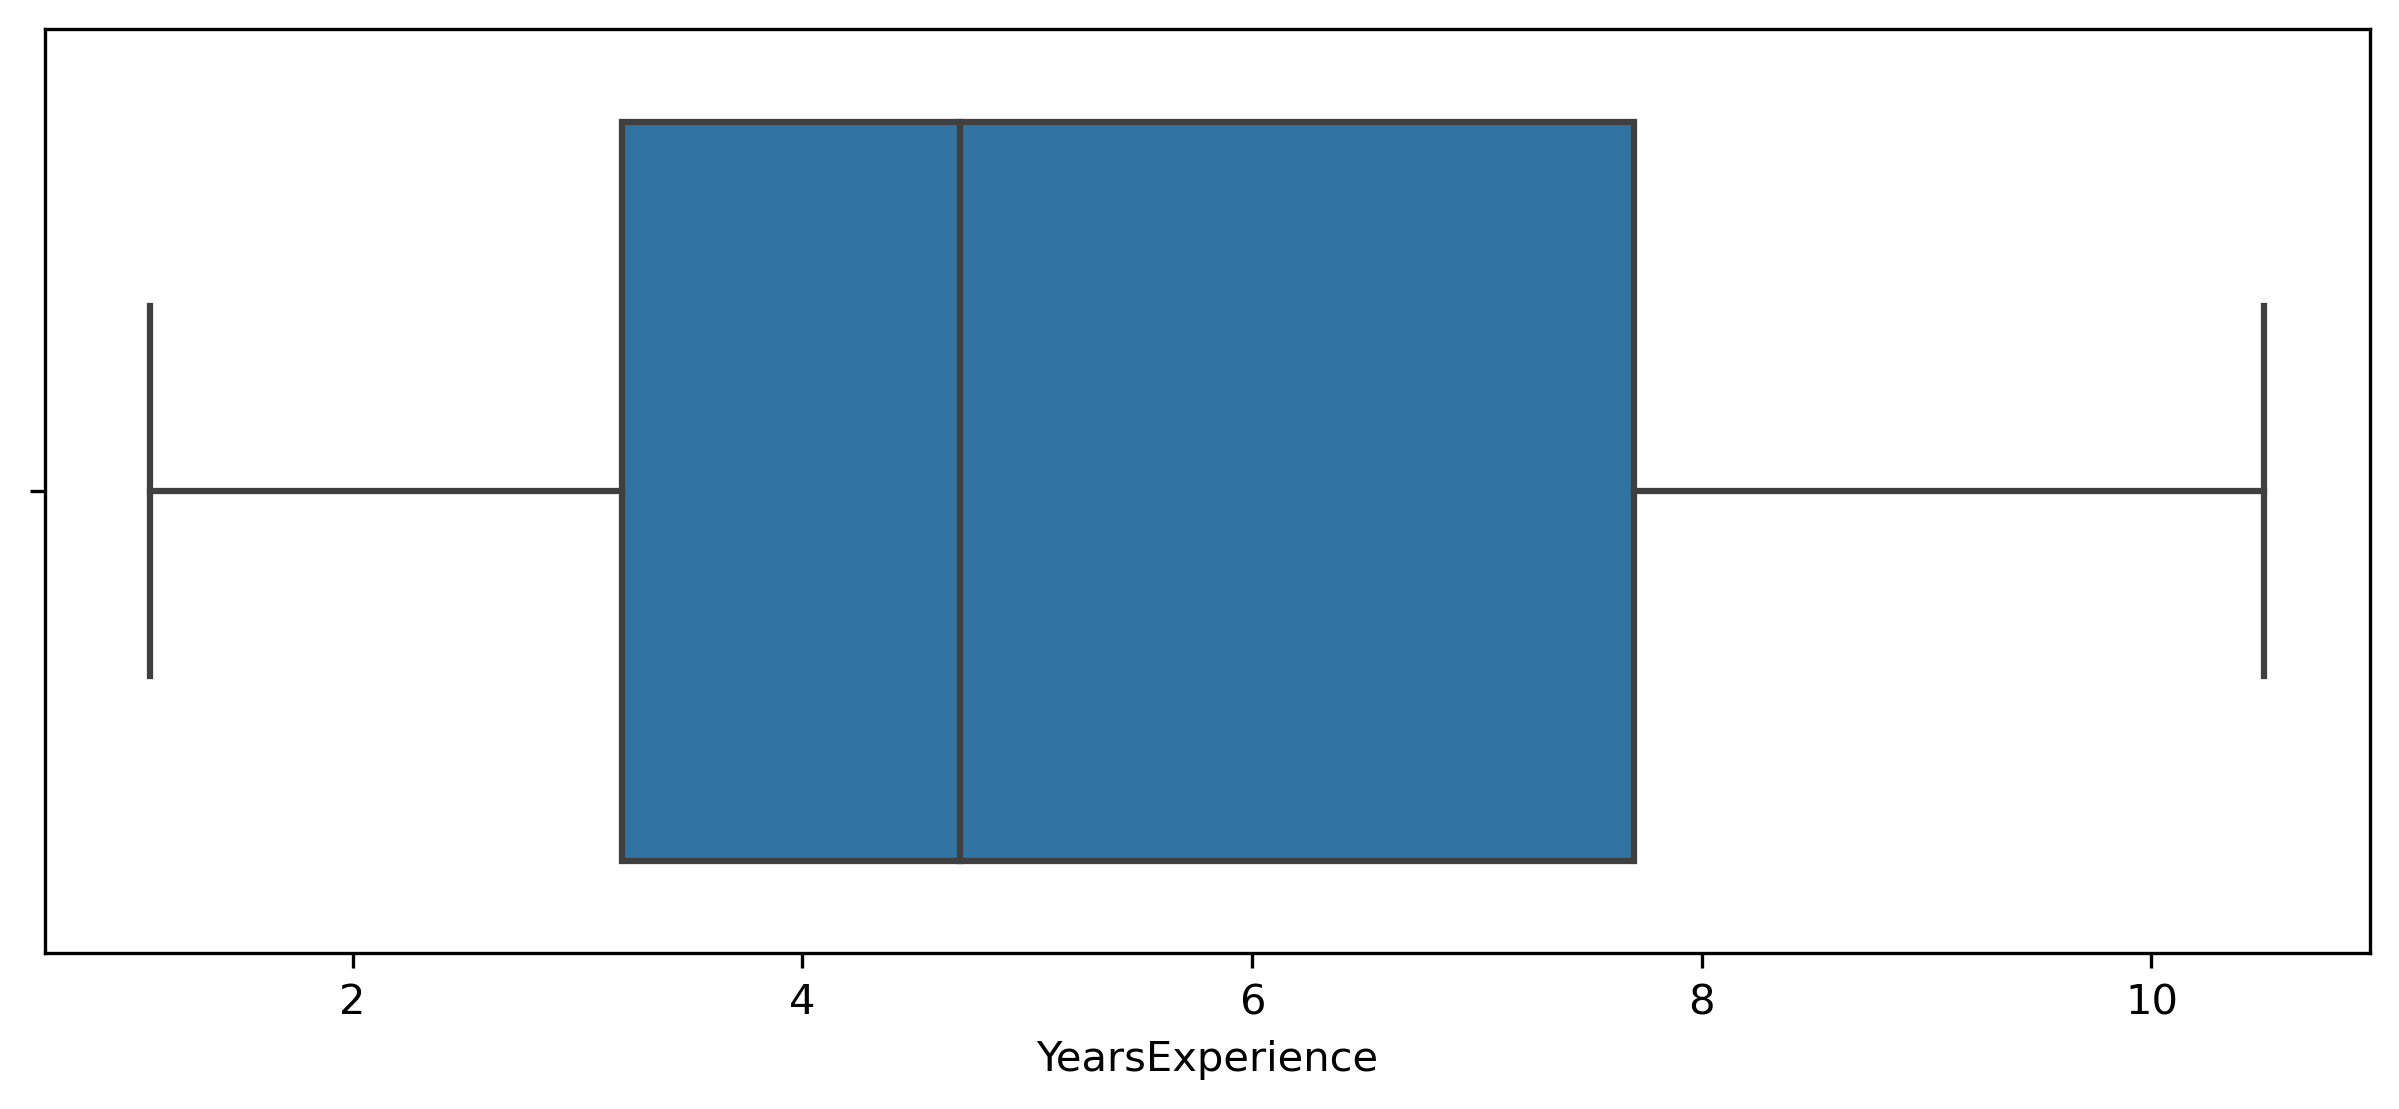

In [36]:
sns.boxplot(x=df['YearsExperience'])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

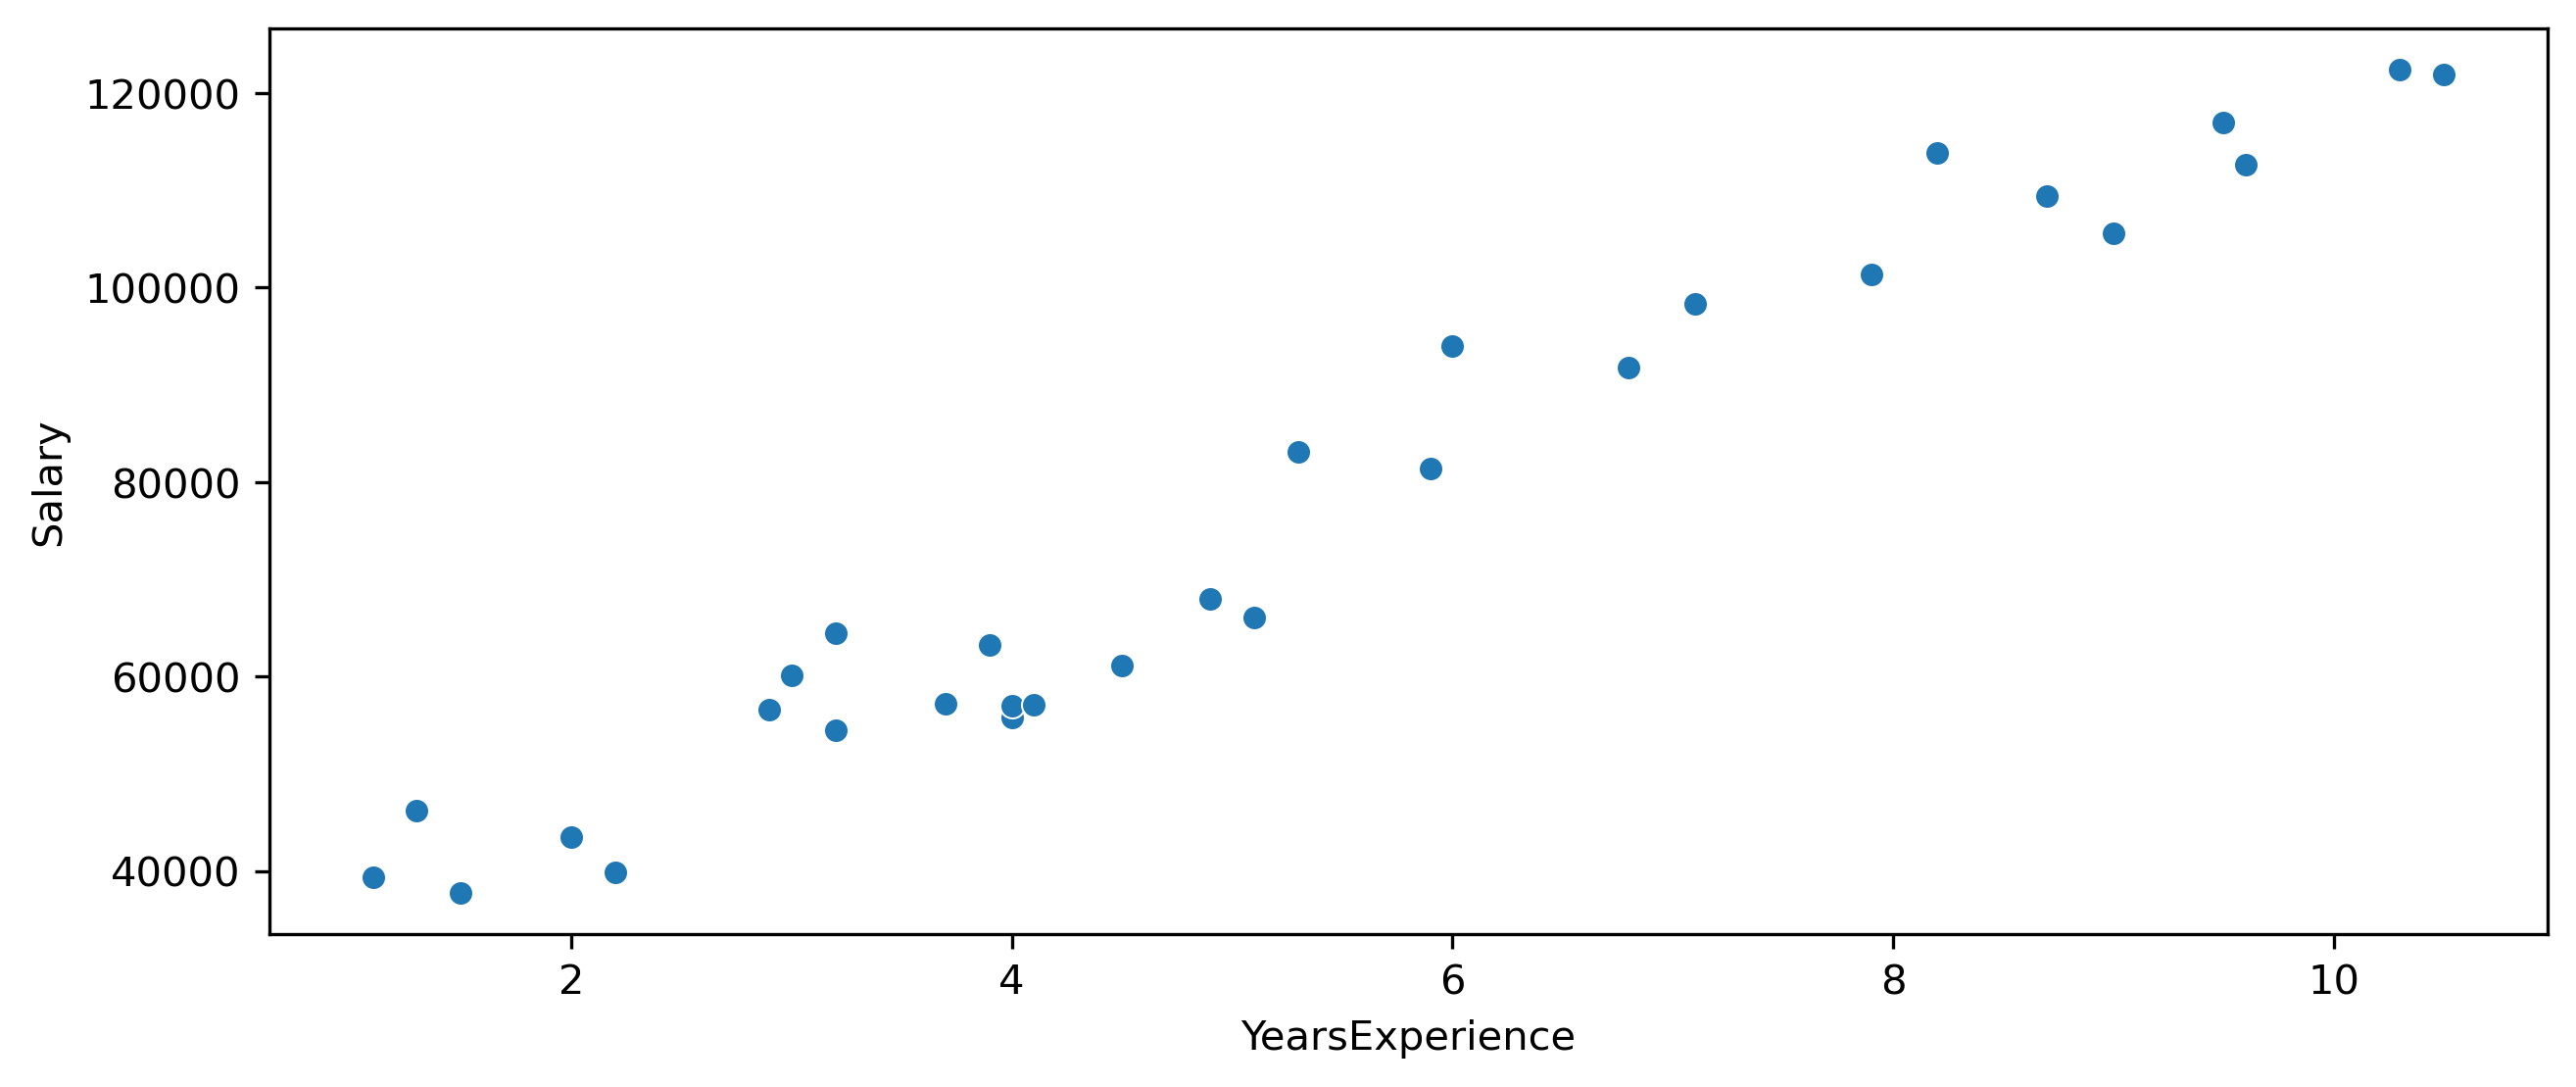

In [37]:
sns.scatterplot(x=df['YearsExperience'],y=df['Salary']) #Visualize relation

In [38]:
df.corr() # How much variables are related to each other

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

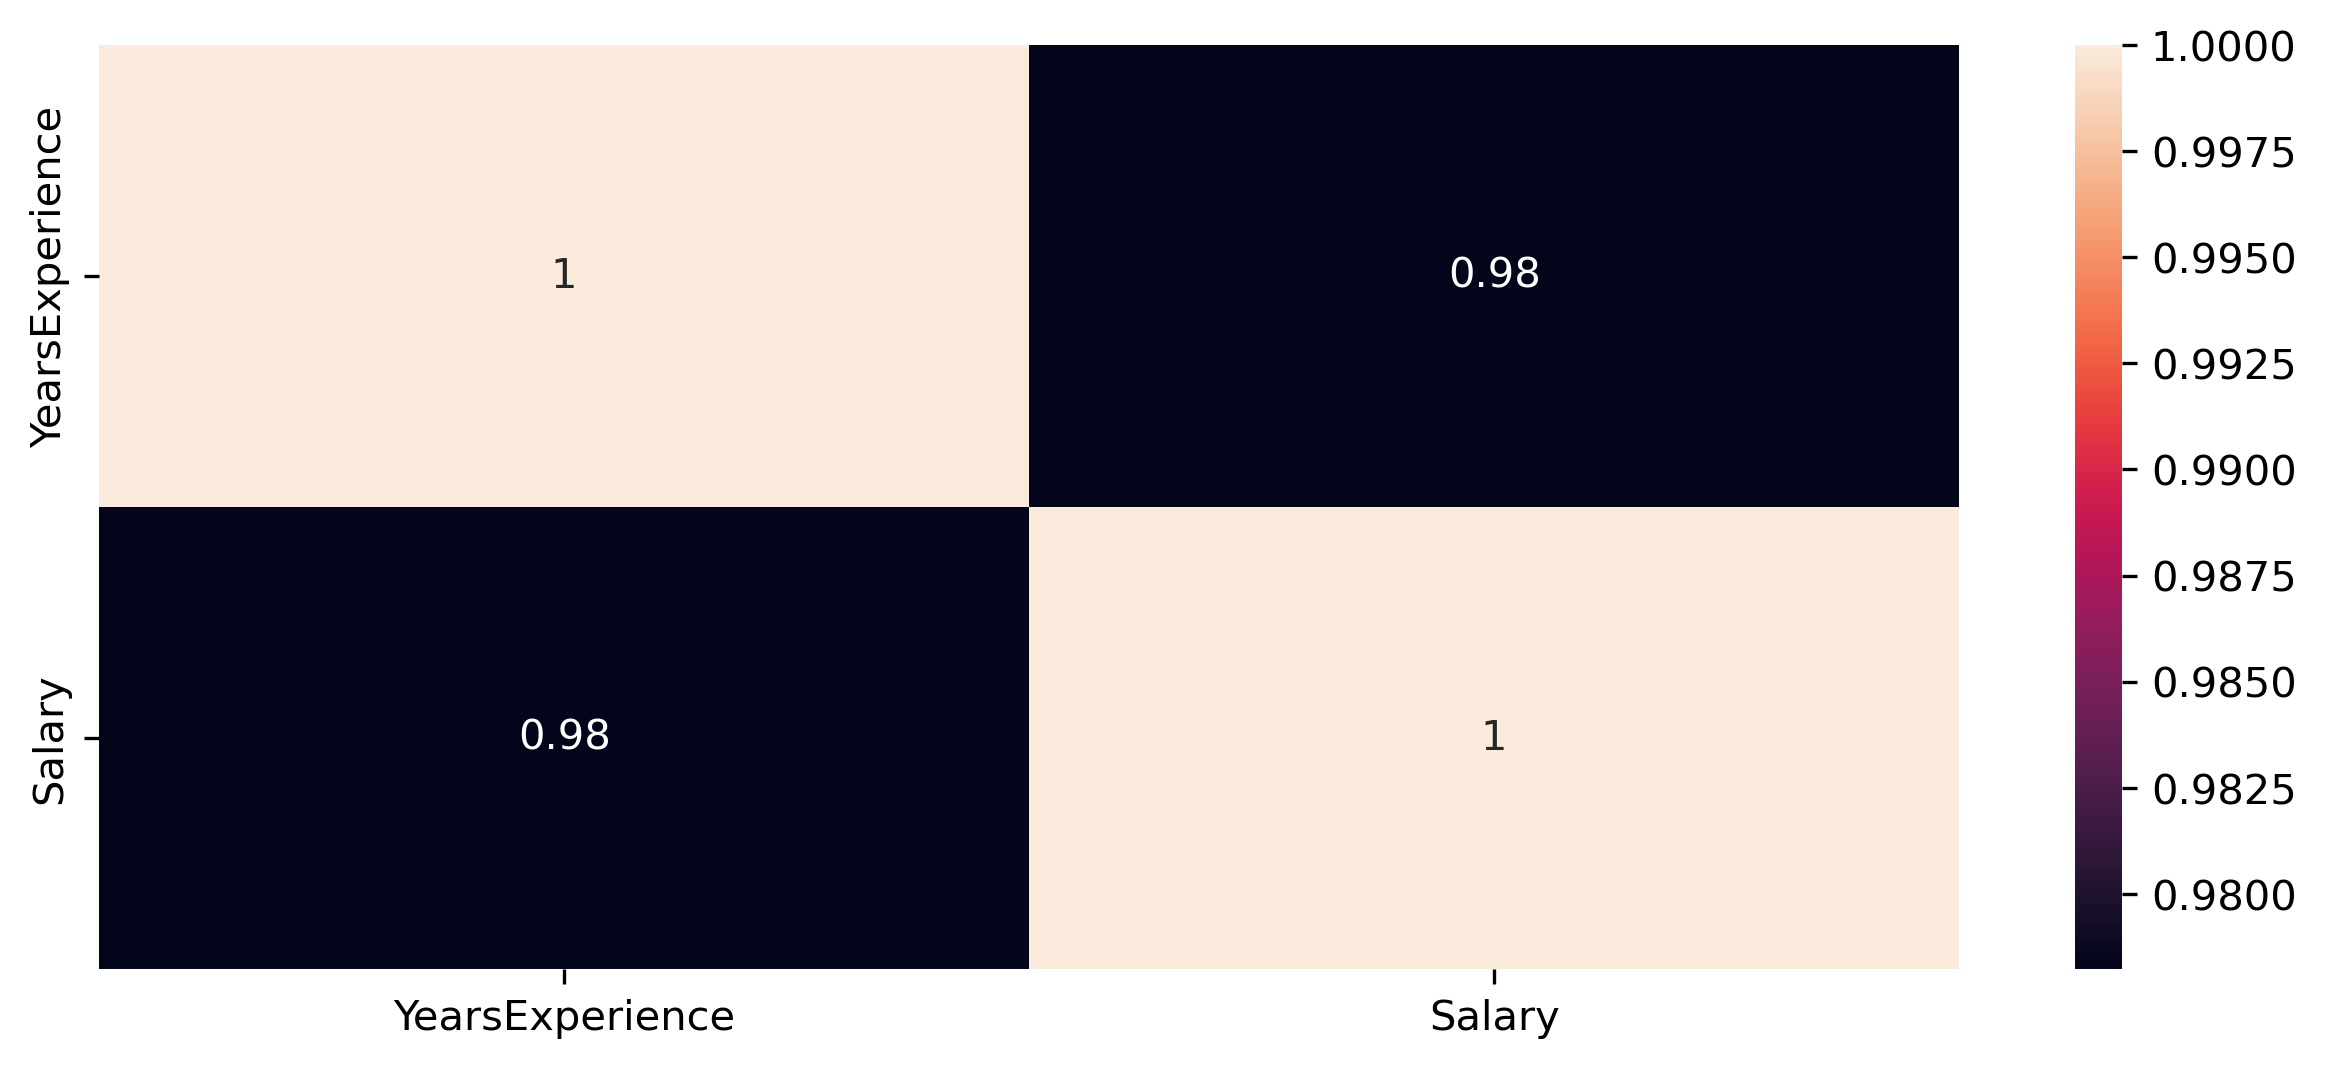

In [39]:
sns.heatmap(df.corr(),annot=True) # Visualize relation

In [40]:
# Model building
model = smf.ols('Salary~YearsExperience',data=df).fit()
model

In [41]:
#Parameter
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [42]:
c,m = model.params
c,m

(25792.20019866871, 9449.962321455074)

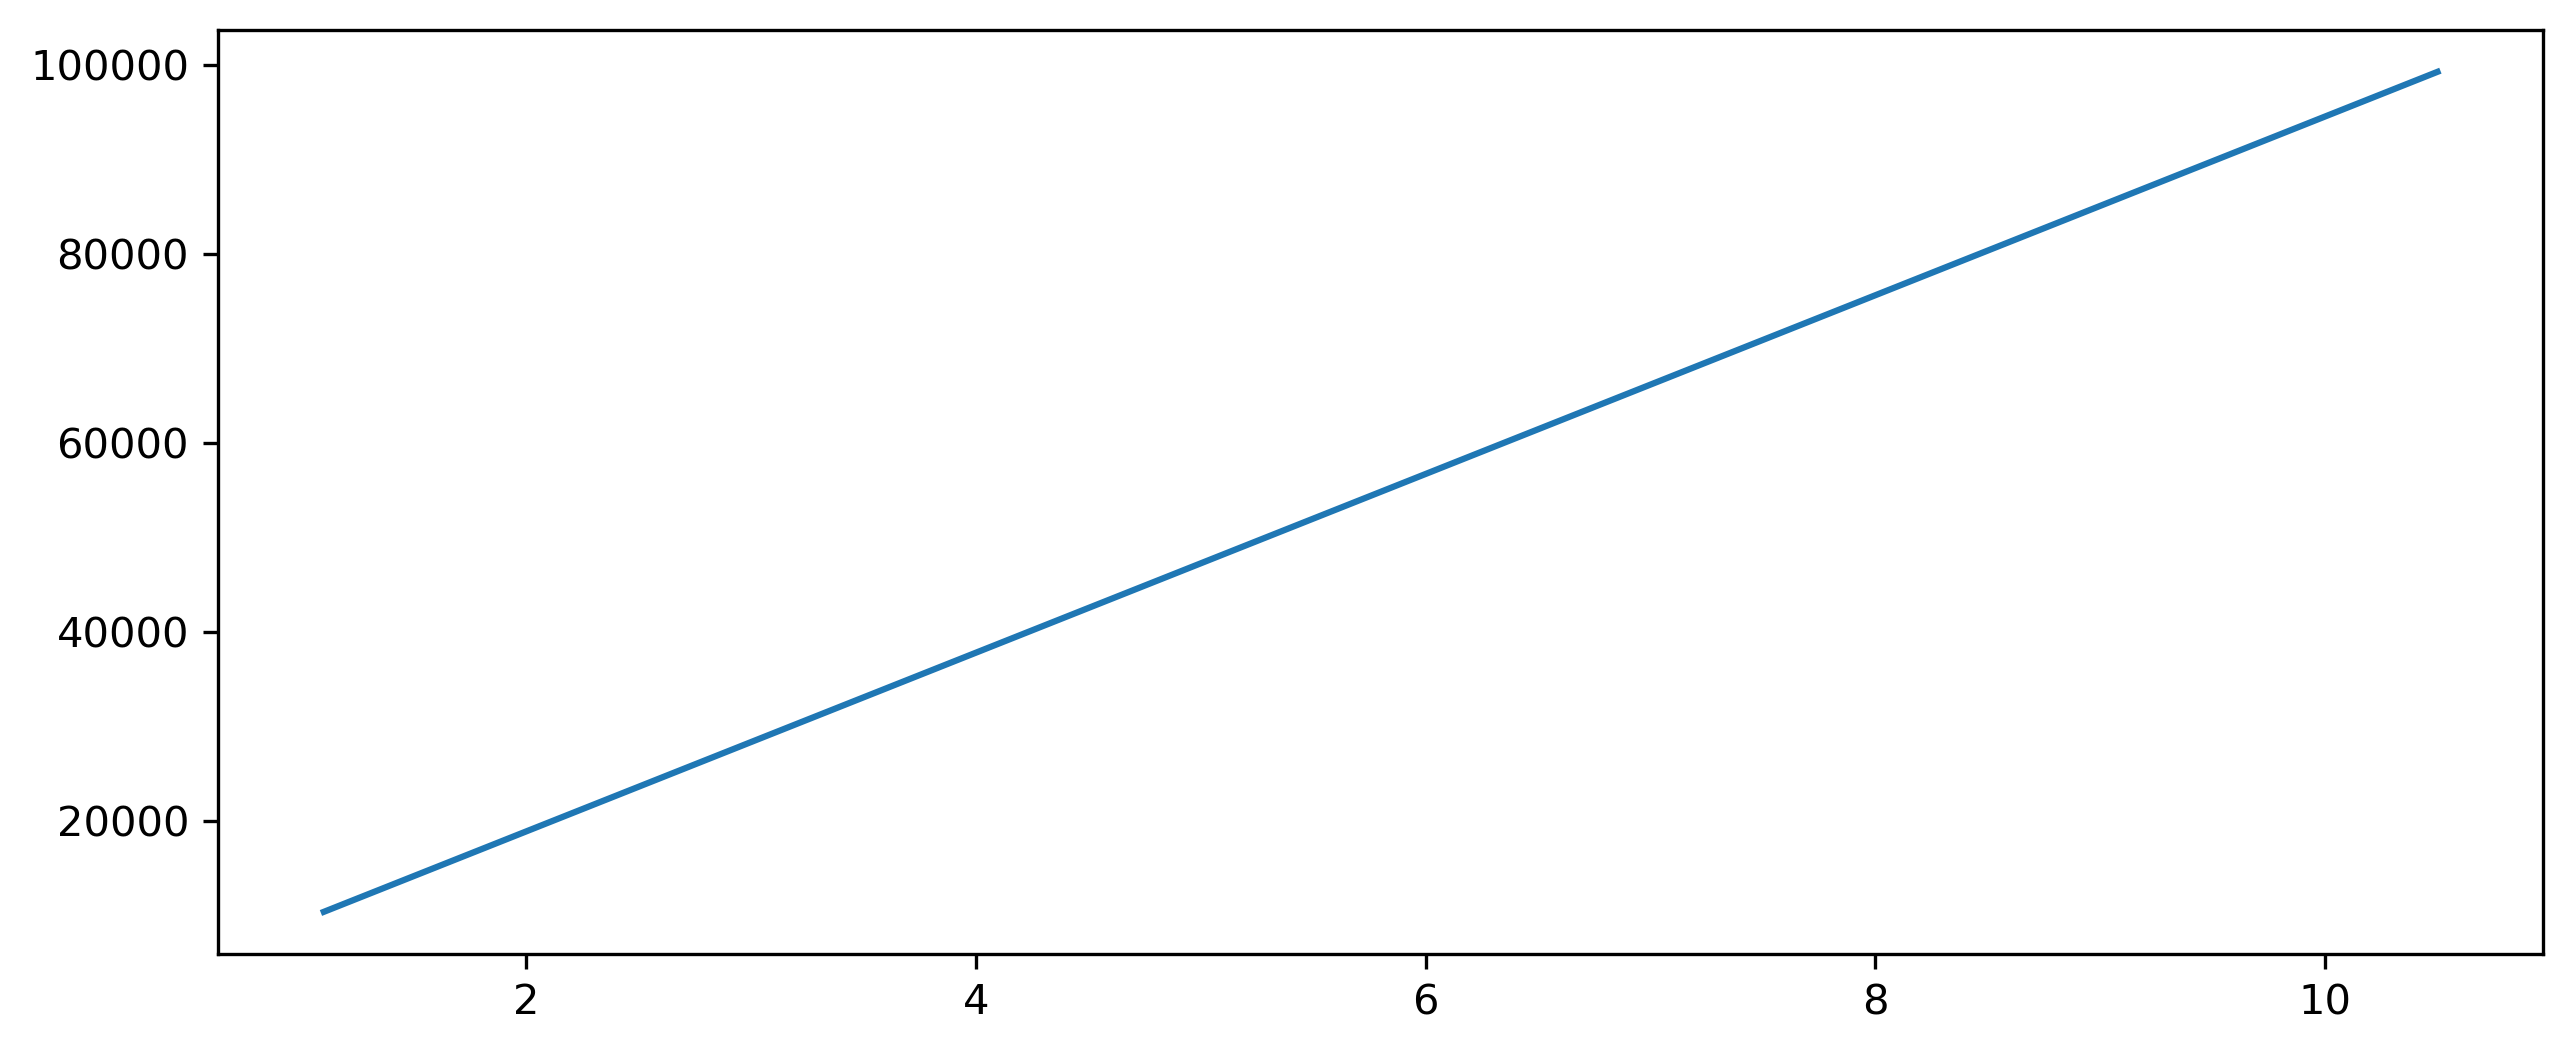

In [43]:
# Best fit line
plt.plot(df['YearsExperience'],m*df['YearsExperience'])

In [44]:
# Evaluation of model
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [45]:
# Test Data
test = pd.DataFrame({
    'YearsExperience' : [1,15.2,8,6.4,7.9]
})
test

,YearsExperience
0,1.0
1,15.2
2,8.0
3,6.4
4,7.9


In [46]:
# Prediction
model.predict(test)

0     35242.162520
1    169431.627485
2    101391.898770
3     86271.959056
4    100446.902538
dtype: float64

In [47]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


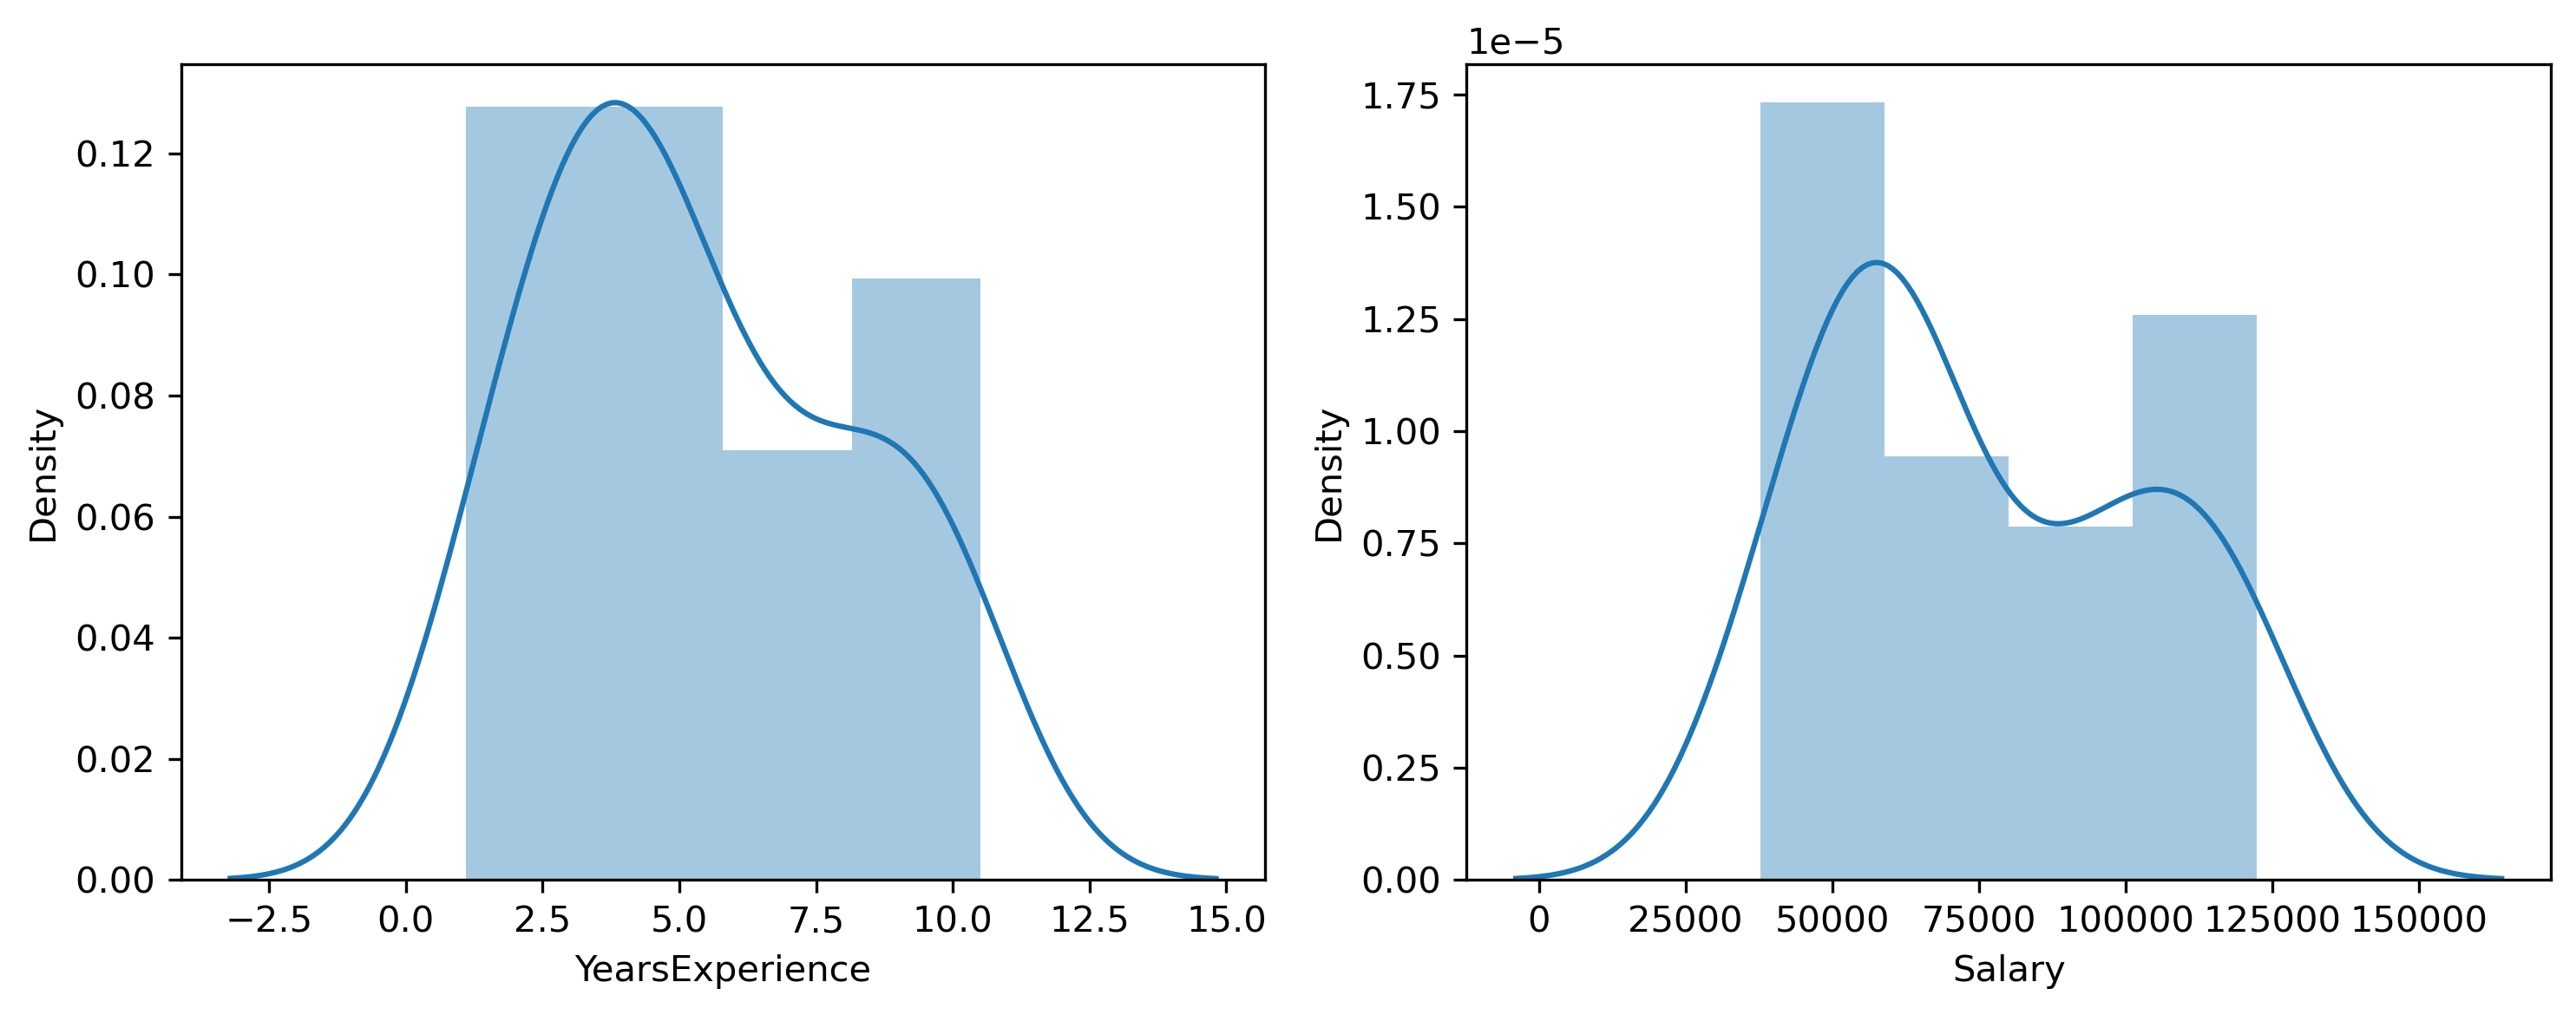

In [48]:
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['Salary'])

plt.tight_layout()

In [49]:
df['YearsExperience'].skew(),df['Salary'].skew()

(0.37956024064804106, 0.35411967922959153)

In [50]:
df['Log_YearsExperience'] = np.log(df['YearsExperience'])
df['Log_Salary'] = np.log(df['Salary'])
df

,YearsExperience,Salary,Log_YearsExperience,Log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906
5,2.9,56642.0,1.064711,10.944506
6,3.0,60150.0,1.098612,11.004597
7,3.2,54445.0,1.163151,10.904946
8,3.2,64445.0,1.163151,11.073567
9,3.7,57189.0,1.308333,10.954117


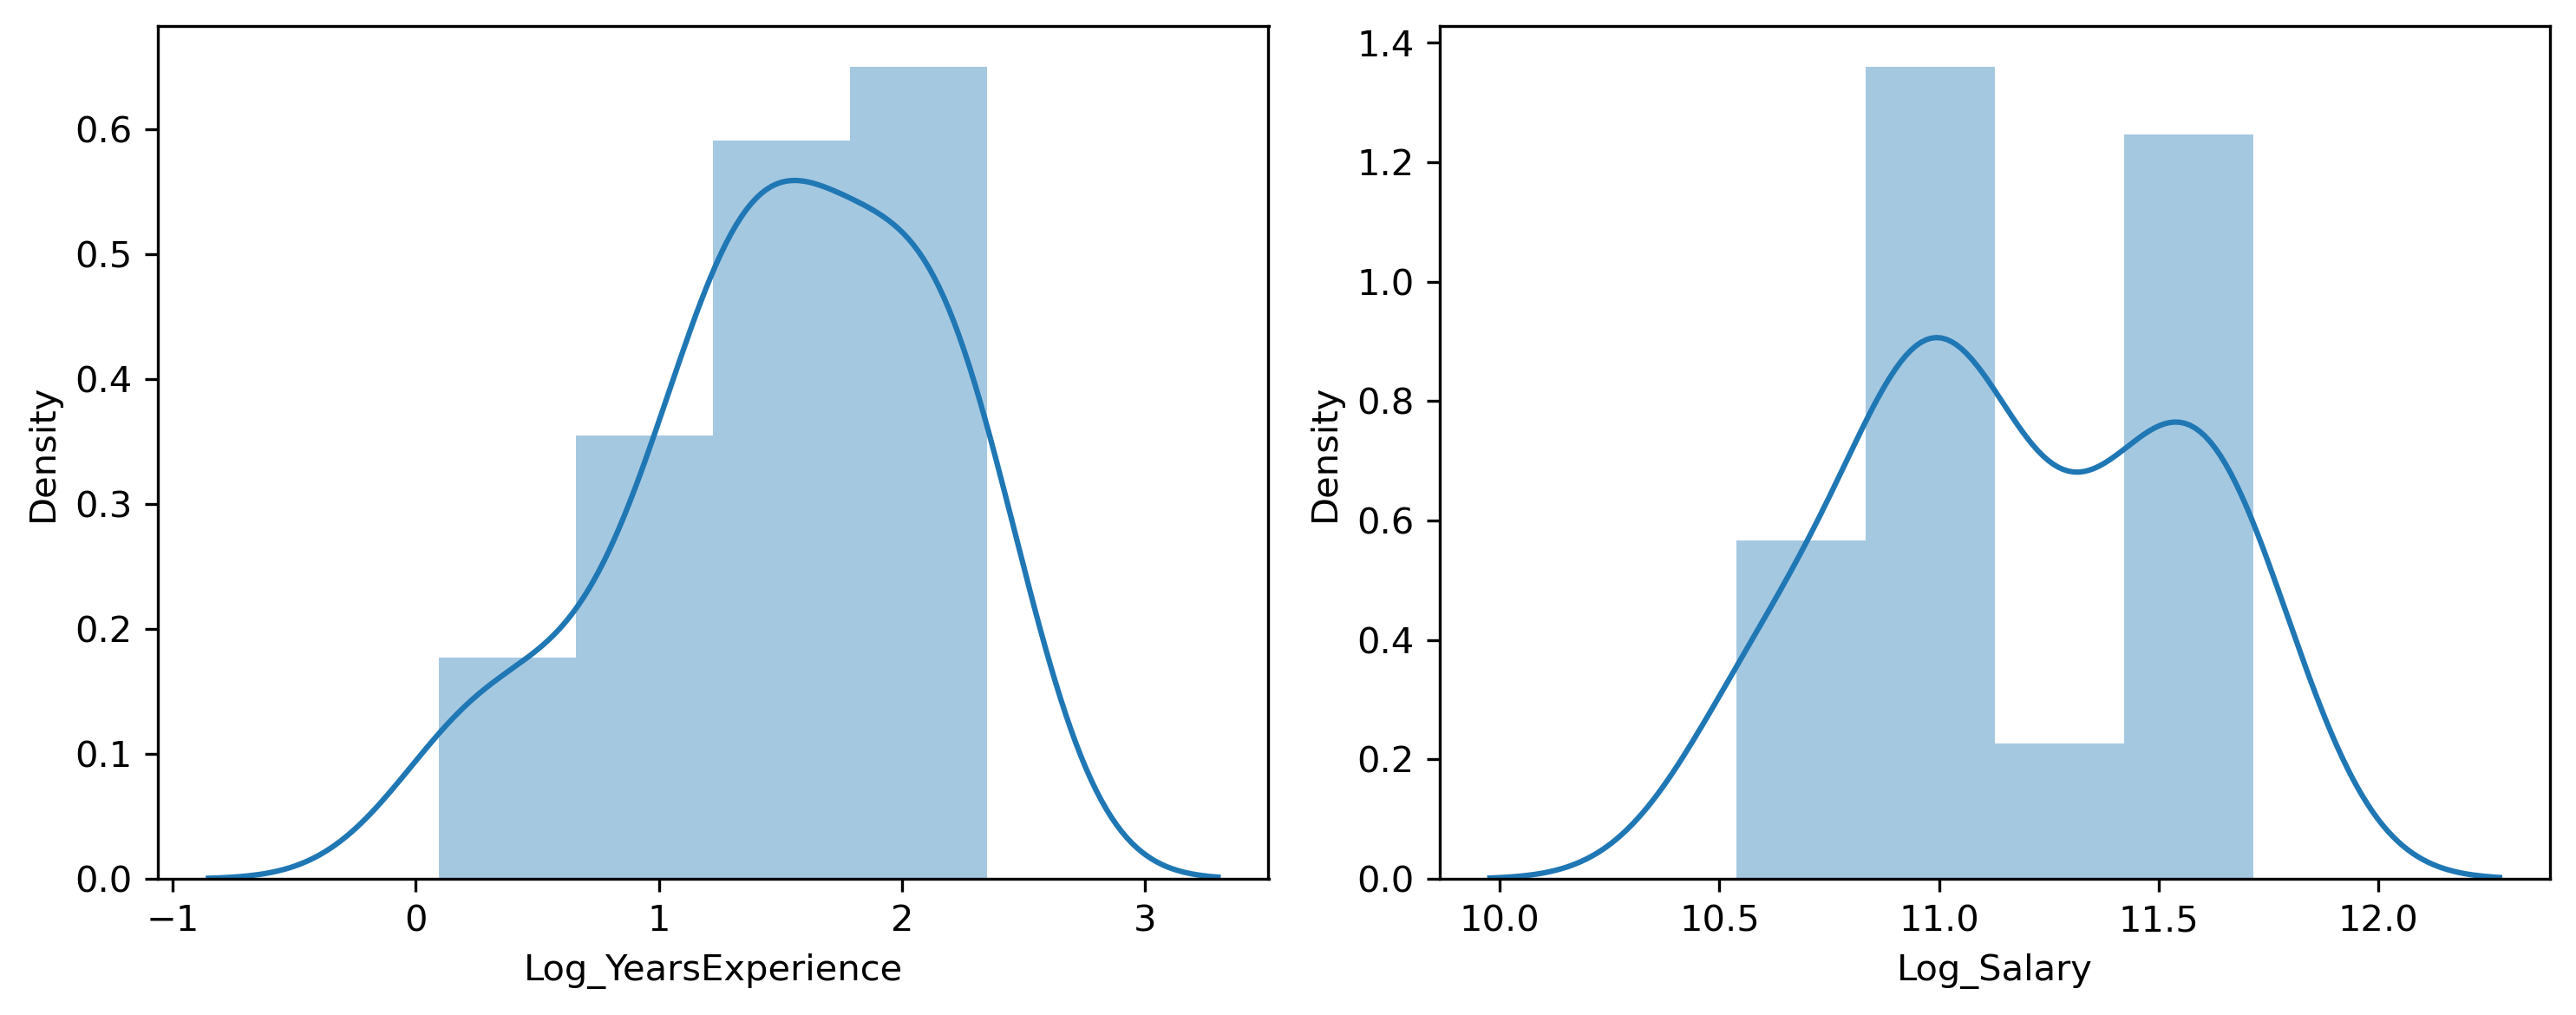

In [51]:
plt.subplot(1,2,1)
sns.distplot(df['Log_YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['Log_Salary'])

plt.tight_layout()

In [52]:
df['Log_YearsExperience'].skew(),df['Log_Salary'].skew()

(-0.6005648582626513, -0.044126086756988495)

In [53]:
df['sqrt_YearsExperience'] = np.sqrt(df['YearsExperience'])
df['sqrt_Salary'] = np.sqrt(df['Salary'])
df

,YearsExperience,Salary,Log_YearsExperience,Log_Salary,sqrt_YearsExperience,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314
5,2.9,56642.0,1.064711,10.944506,1.702939,237.995798
6,3.0,60150.0,1.098612,11.004597,1.732051,245.254969
7,3.2,54445.0,1.163151,10.904946,1.788854,233.334524
8,3.2,64445.0,1.163151,11.073567,1.788854,253.860198
9,3.7,57189.0,1.308333,10.954117,1.923538,239.142217


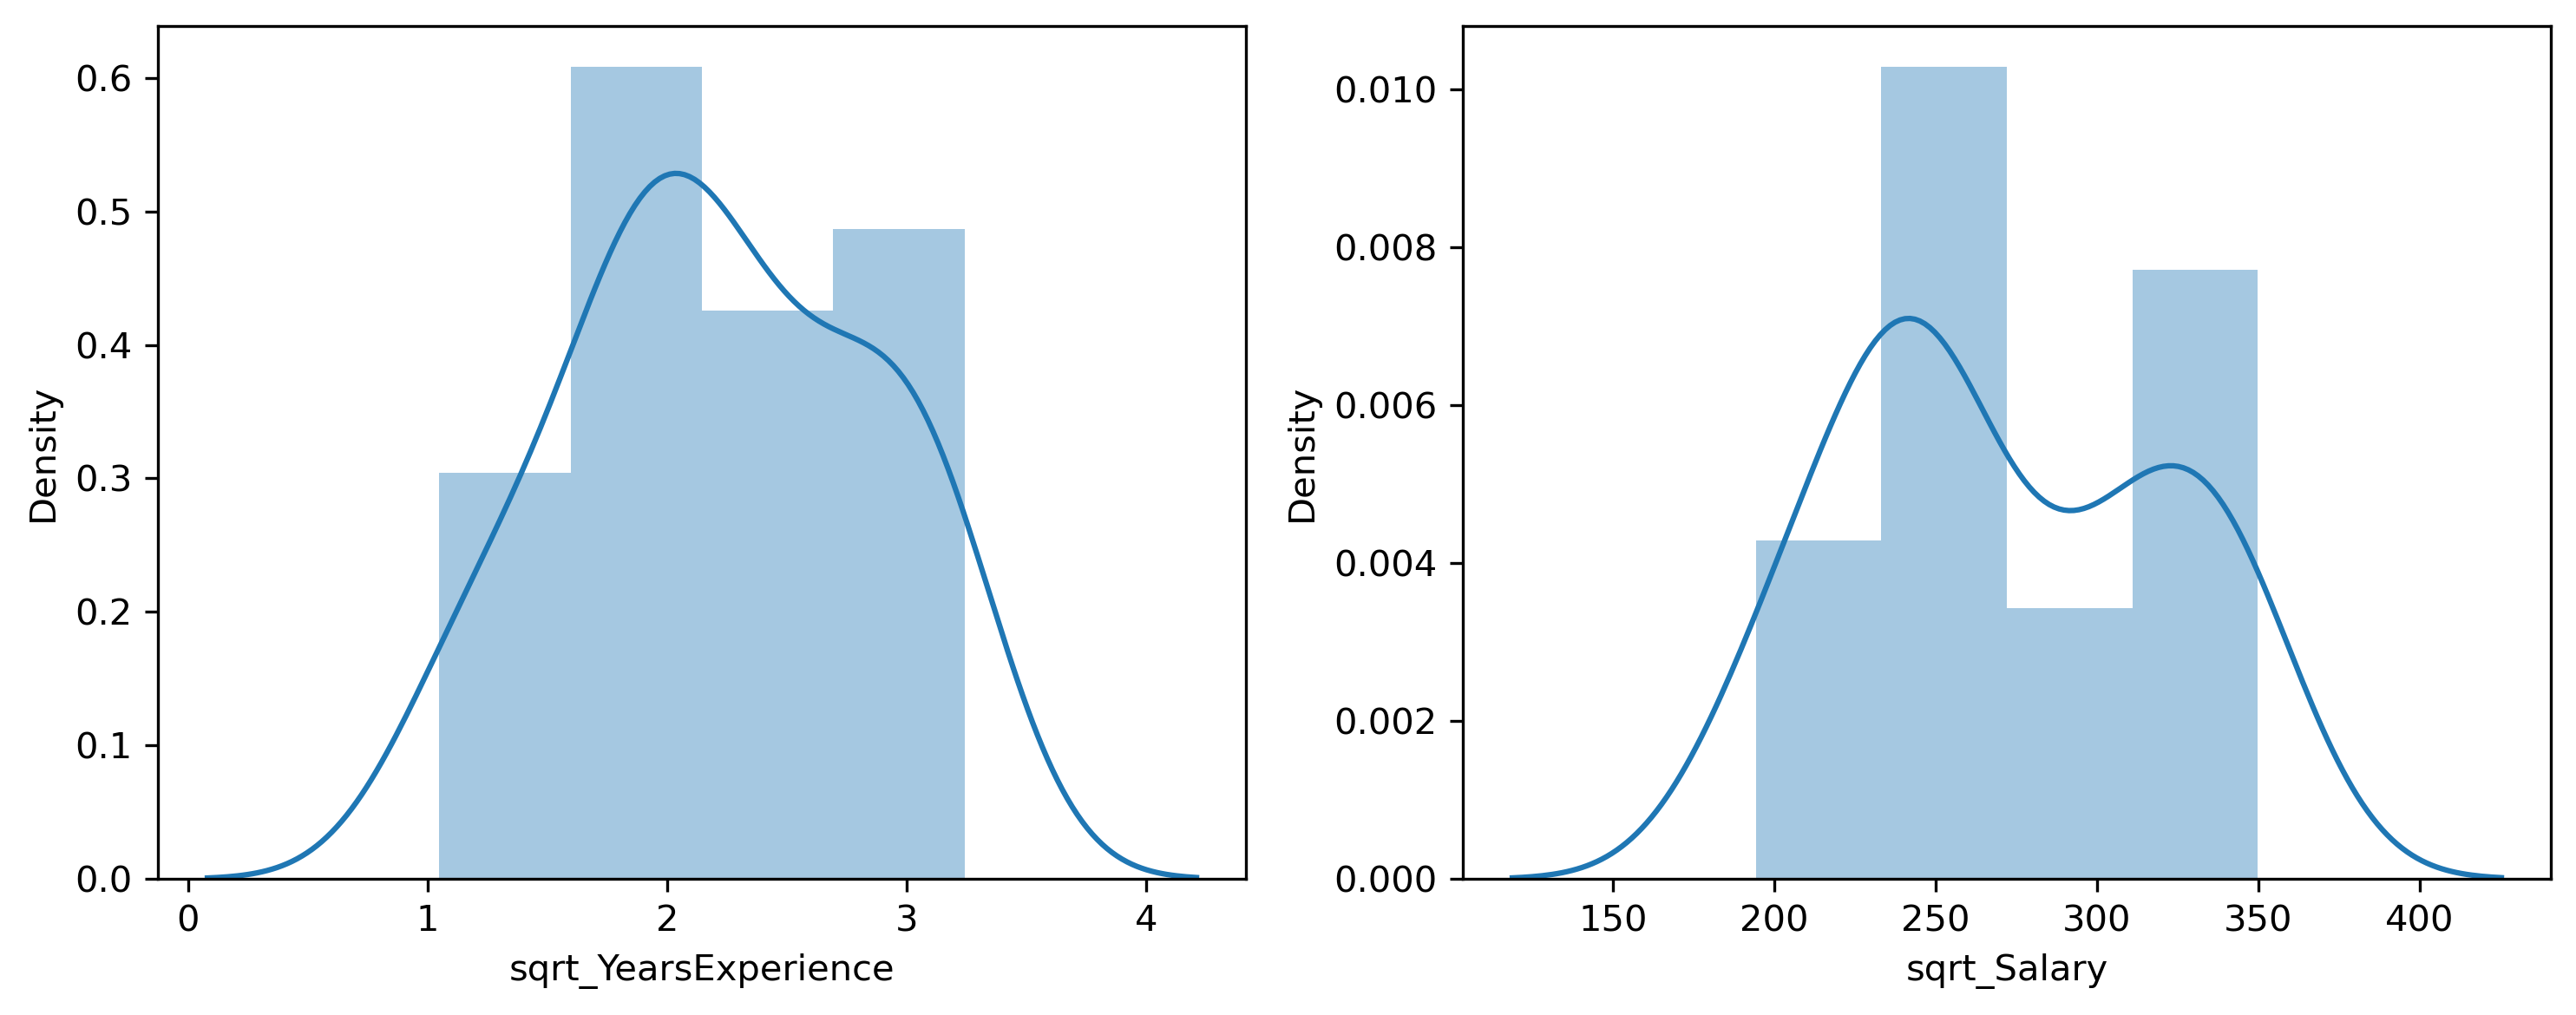

In [54]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_Salary'])

plt.tight_layout()

In [55]:
df['sqrt_YearsExperience'].skew(),df['sqrt_Salary'].skew()

(-0.04919608394250605, 0.16904336802767353)